In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import os.path as path
import numpy as np
import torch
from matplotlib.patches import Rectangle
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import cv2
import random
import seaborn as sns
sns.set(font_scale=1.5)
from pprint import pprint
from IPython.display import HTML # to show the animation in Jupyter
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
import sys
sys.path.append('../')
from src import utils 
from src.UNet import *
from src.datatools import *

## Scenario 1

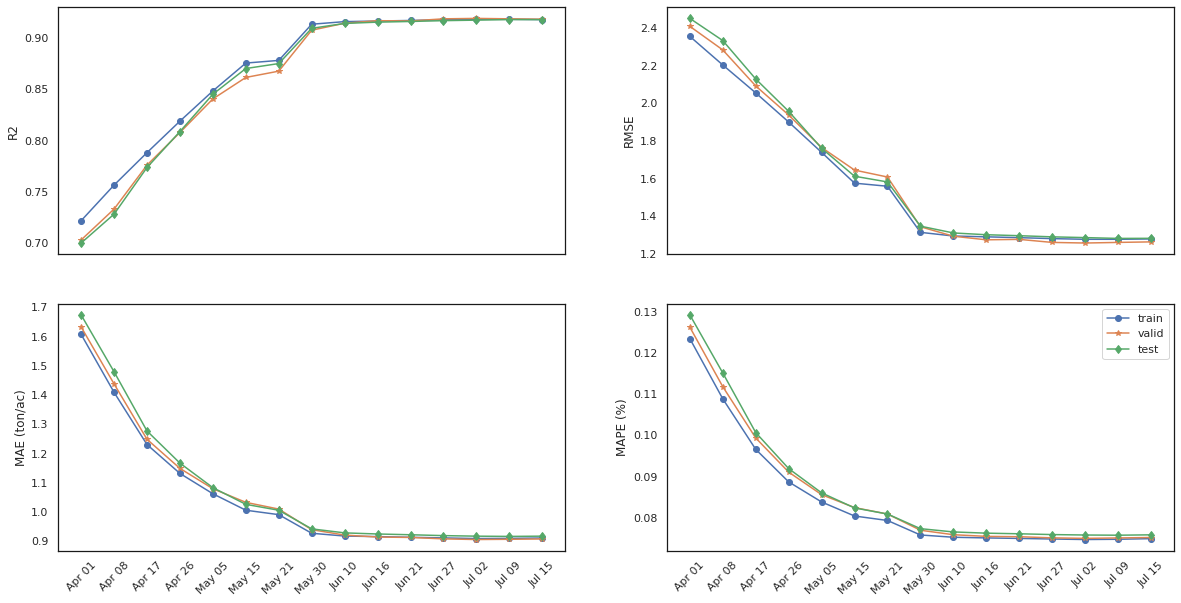

In [74]:
S1_train_df = pd.read_csv('./EXPs/EXP_S1_UNetLSTM_10m_time/S1_UNetLSTM_10m_time_train.csv', index_col=0)
S1_valid_df = pd.read_csv('./EXPs/EXP_S1_UNetLSTM_10m_time/S1_UNetLSTM_10m_time_valid.csv', index_col=0) 
S1_test_df  = pd.read_csv('./EXPs/EXP_S1_UNetLSTM_10m_time/S1_UNetLSTM_10m_time_test.csv',  index_col=0) 
R_S1 = utils.time_series_2d_eval(S1_train_df, S1_valid_df, S1_test_df, 'test', save = False)

In [ ]:
_ = utils.train_val_test_satterplot(S1_train_df, S1_valid_df, S1_test_df, week = 15, cmap  = 'viridis', mincnt = 2000)

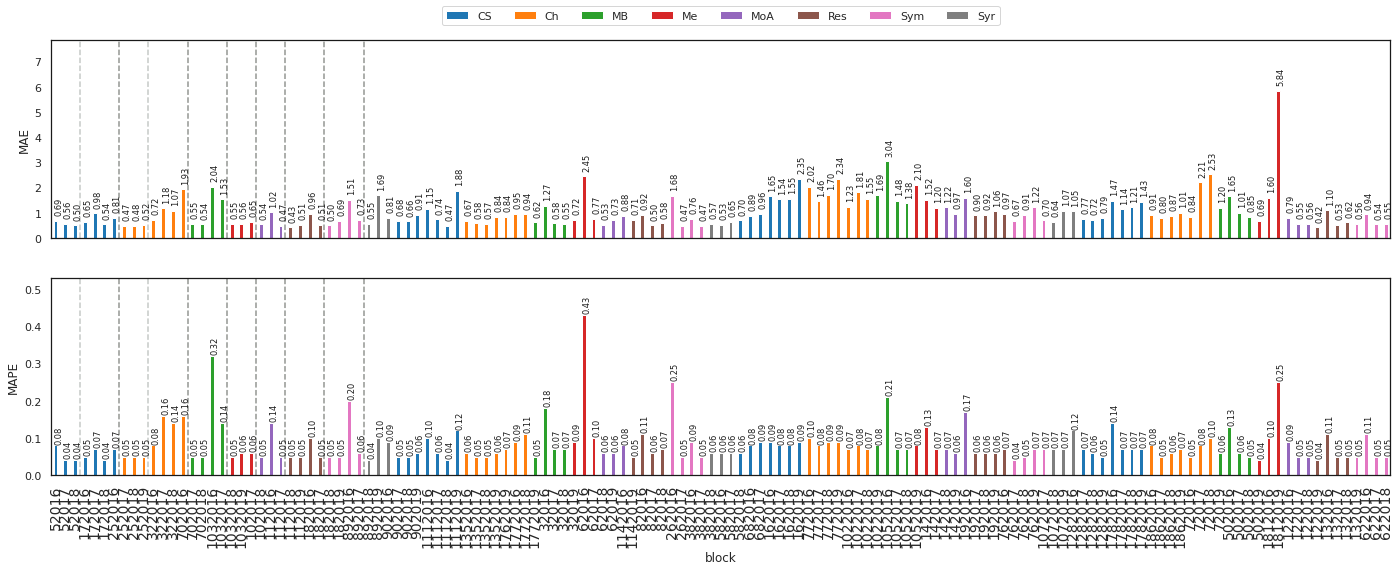

In [22]:
source = pd.read_csv('./EXPs/EXP_S1_UNetLSTM_10m_time/S1_UNetLSTM_10m_time_test_bc1.csv')
S1_time_blocks, S1_time_cultivars = utils.block_cultivar_test_csv_results_2d(source, week = 'ypred_w15', 
save_dir = './EXPs/EXP_S1_UNetLSTM_10m_time', save_csv_name = 'ConvLSTM_10m_time_')

_ = utils.block_eval_barplot(S1_time_blocks, cultivar_list = None, block_list = None)

In [83]:
def year_extraction(name):

    name = 'year_' + str(name)
    name_split = os.path.split(name)[-1]
    year = name_split.replace(name_split[:-4], '')
    return year


def year_wise_scenarios(df): 

    df['year']  = [year_extraction(df.loc[i, 'block']) for i, row in df.iterrows()]
    
    year_wise_df = df.groupby(by = 'year')
    Years, MAE_R, MAPE_R = [], [] , []
    for year, df_year in year_wise_df:
        Years.append(year)
        results = utils.regression_metrics(df_year['ytrue'], df_year['ypred_w15'])
        MAE_R.append(results[1])
        MAPE_R.append(results[3])
    return Years, MAE_R, MAPE_R

def year_wise_scenario2(list_of_df): 

    MAE_R, MAPE_R = [], [] 

    for this_df in list_of_df:
    
        results = utils.regression_metrics(this_df['ytrue'], this_df['ypred_w15'])
        MAE_R.append(results[1])
        MAPE_R.append(results[3])
    
    MAE_M = np.mean(MAE_R)
    MAE_S = np.std(MAE_R)
    MAPE_M = np.mean(MAPE_R)
    MAPE_S = np.std(MAPE_R)
    
    return MAE_M, MAE_S, MAPE_M, MAPE_S

In [77]:
source = pd.read_csv('./EXPs/EXP_S1_UNetLSTM_10m_time/S1_UNetLSTM_10m_time_test_bc1.csv')
Years_S1, MAE_Year_S1, MAPE_Year_S1 = year_wise_scenarios(source)

print(f"Year {Years_S1[0]}: MAE = {MAE_Year_S1[0]}, MAPE = {MAPE_Year_S1[0]} ")
print(f"Year {Years_S1[1]}: MAE = {MAE_Year_S1[1]}, MAPE = {MAPE_Year_S1[1]} ")
print(f"Year {Years_S1[2]}: MAE = {MAE_Year_S1[2]}, MAPE = {MAPE_Year_S1[2]} ")
print(f"Year {Years_S1[3]}: MAE = {MAE_Year_S1[3]}, MAPE = {MAPE_Year_S1[3]} ")

Year 2016: MAE = 1.178369125065861, MAPE = 0.12646501931175963 
Year 2017: MAE = 0.8065950429637282, MAPE = 0.06342621331128101 
Year 2018: MAE = 0.814306981440512, MAPE = 0.059083723571529176 
Year 2019: MAE = 0.9424159917500224, MAPE = 0.06342006410999777 


## Scanerio 2

#### test: 2016 

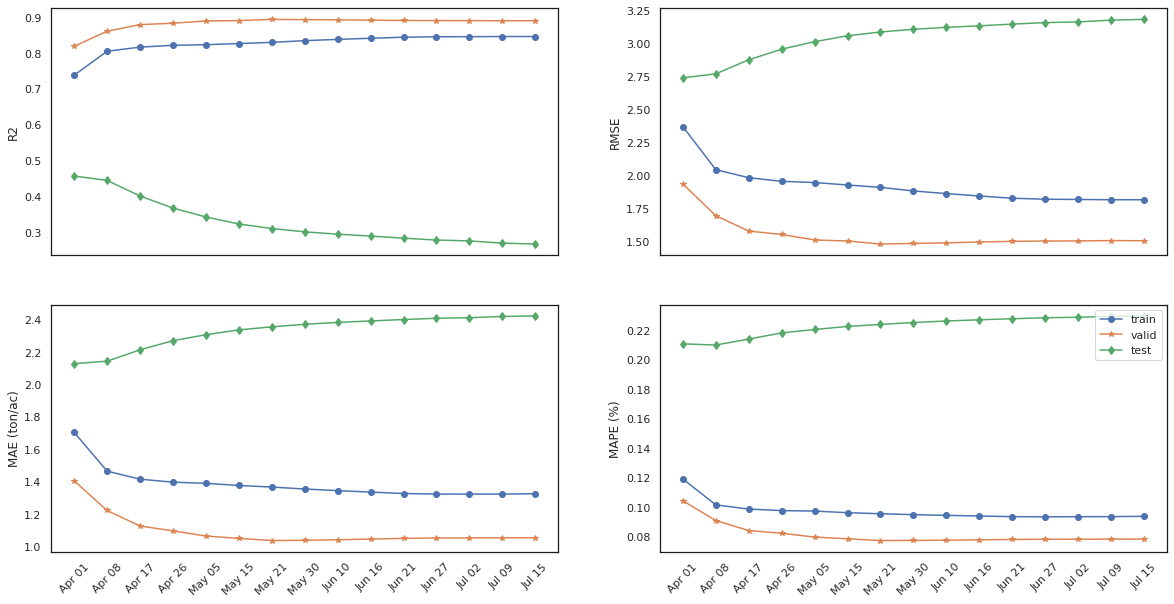

In [75]:
S2_train_df_Y1716 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1716_01_time_10m/S2_Y1716_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1716 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1716_01_time_10m/S2_Y1716_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1716  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1716_01_time_10m/S2_Y1716_01_time_10m_test.csv',  index_col=0) 
R_Y1716 = utils.time_series_2d_eval(S2_train_df_Y1716, S2_valid_df_Y1716, S2_test_df_Y1716, 'test', save = False)

In [81]:
S2_Y1716_BC = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1716_01_time_10m/S2_Y1716_01_time_10m_test_bc1.csv', index_col=0)
#S2_Y1716_B, S2_Y1716_C = utils.block_cultivar_test_csv_results_2d(S2_Y1716_BC, week = 'ypred_w15', 
#                                                                    save_dir = '/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1716_01_time_10m', 
#                                                                    save_csv_name = 'ConvLSTM_10m')

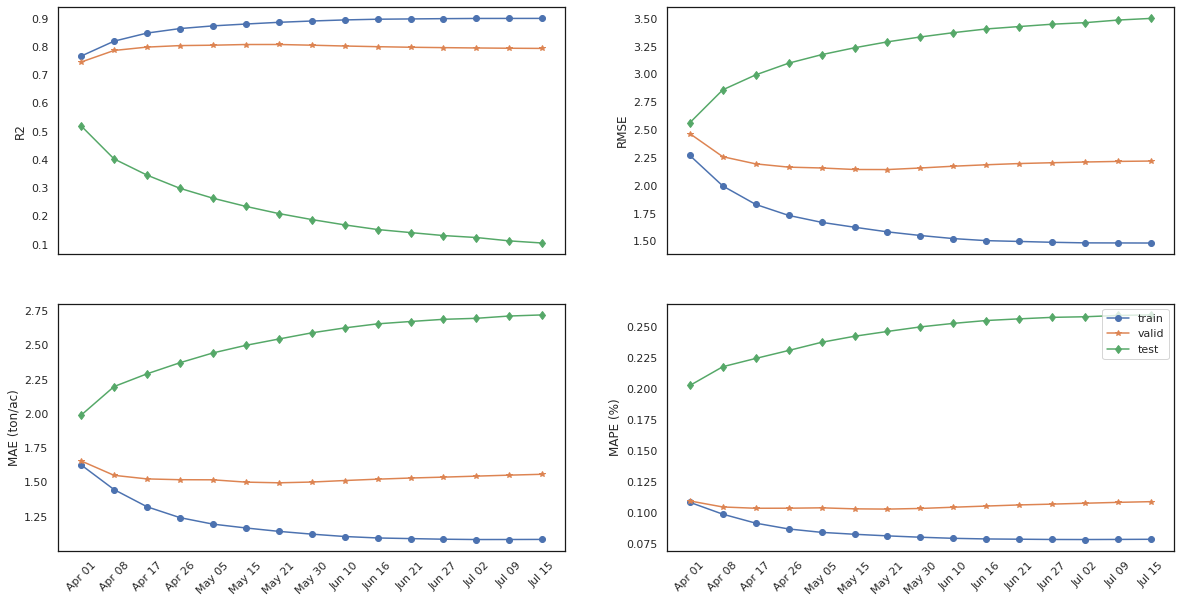

In [76]:
S2_train_df_Y1816 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1816_01_time_10m/S2_Y1816_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1816 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1816_01_time_10m/S2_Y1816_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1816  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1816_01_time_10m/S2_Y1816_01_time_10m_test.csv',  index_col=0) 
R_Y1816 = utils.time_series_2d_eval(S2_train_df_Y1816, S2_valid_df_Y1816, S2_test_df_Y1816, 'test', save = False)

In [80]:
S2_Y1816_BC = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1816_01_time_10m/S2_Y1816_01_time_10m_test_bc1.csv', index_col=0)
#S2_Y1816_B, S2_Y1816_C = utils.block_cultivar_test_csv_results_2d(S2_Y1816_BC, week = 'ypred_w15', 
#                                                                    save_dir = '/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1816_01_time_10m', 
#                                                                    save_csv_name = 'ConvLSTM_10m')

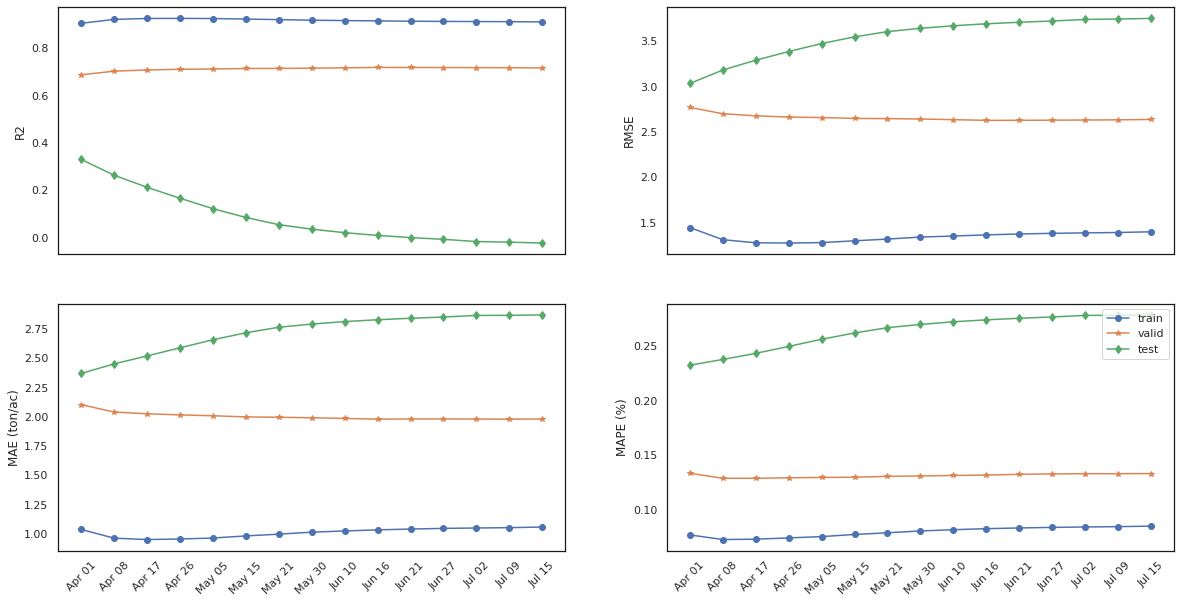

In [77]:
S2_train_df_Y1916 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1916_01_time_10m/S2_Y1916_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1916 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1916_01_time_10m/S2_Y1916_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1916  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1916_01_time_10m/S2_Y1916_01_time_10m_test.csv',  index_col=0) 
R_Y1916 = utils.time_series_2d_eval(S2_train_df_Y1916, S2_valid_df_Y1916, S2_test_df_Y1916, 'test', save = False)

In [79]:
S2_Y1916_BC = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1916_01_time_10m/S2_Y1916_01_time_10m_test_bc1.csv', index_col=0)
#S2_Y1916_B, S2_Y1916_C = utils.block_cultivar_test_csv_results_2d(S2_Y1916_BC, week = 'ypred_w15', 
#                                                                    save_dir = '/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1916_01_time_10m', 
#                                                                    save_csv_name = 'ConvLSTM_10m')

In [85]:
results_year2016 = year_wise_scenario2([S2_Y1716_BC, S2_Y1816_BC, S2_Y1916_BC])
print(f"Year 2016: MAE Mean = {results_year2016[0]}, MAE Std = {results_year2016[1]} ")
print(f"Year 2016: MAPE Mean = {results_year2016[2]}, MAPE Std= {results_year2016[3]} ")

Year 2016: MAE Mean = 2.6728705259853975, MAE Std = 0.18556233099275915 
Year 2016: MAPE Mean = 0.25590669599877786, MAPE Std= 0.019935164681731565 


#### Test: 2017

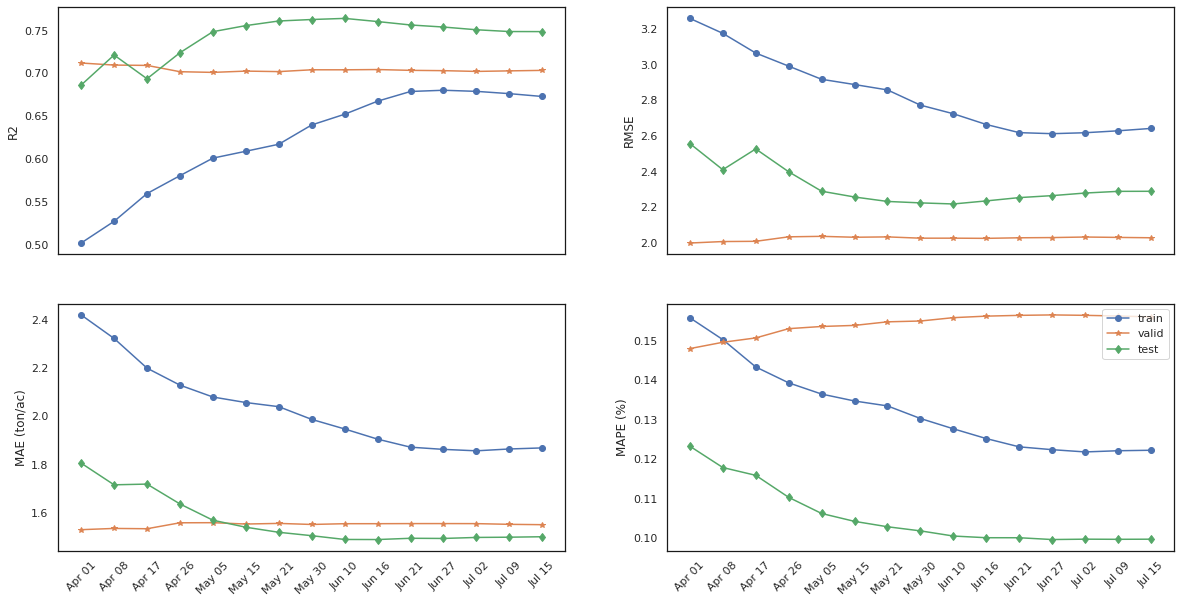

In [78]:
S2_train_df_Y1617 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1617_01_time_10m/S2_Y1617_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1617 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1617_01_time_10m/S2_Y1617_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1617  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1617_01_time_10m/S2_Y1617_01_time_10m_test.csv',  index_col=0) 
R_Y1617 = utils.time_series_2d_eval(S2_train_df_Y1617, S2_valid_df_Y1617, S2_test_df_Y1617, 'test', save = False)

In [86]:
S2_Y1617_BC = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1617_01_time_10m/S2_Y1617_01_time_10m_test_bc1.csv', index_col=0)
#S2_Y1617_B, S2_Y1617_C = utils.block_cultivar_test_csv_results_2d(S2_Y1617_BC, week = 'ypred_w15', 
#                                                                   save_dir = '/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1617_01_time_10m', 
#                                                                   save_csv_name = 'ConvLSTM_10m')

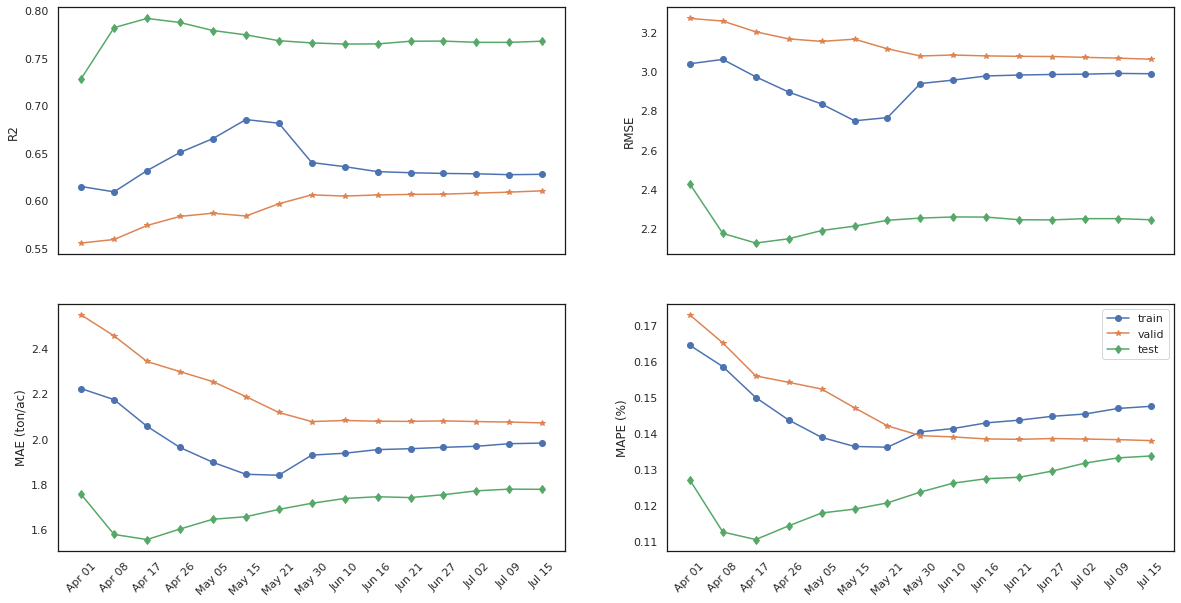

In [79]:
S2_train_df_Y1817 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1817_01_time_10m/S2_Y1817_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1817 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1817_01_time_10m/S2_Y1817_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1817  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1817_01_time_10m/S2_Y1817_01_time_10m_test.csv',  index_col=0) 
R_Y1817 = utils.time_series_2d_eval(S2_train_df_Y1817, S2_valid_df_Y1817, S2_test_df_Y1817, 'test', save = False)

In [87]:
S2_Y1817_BC = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1817_01_time_10m/S2_Y1817_01_time_10m_test_bc1.csv', index_col=0)
#S2_Y1817_B, S2_Y1817_C = utils.block_cultivar_test_csv_results_2d(S2_Y1817_BC, week = 'ypred_w15', 
#                                                                    save_dir = '/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1817_01_time_10m', 
#                                                                   save_csv_name = 'ConvLSTM_10m')

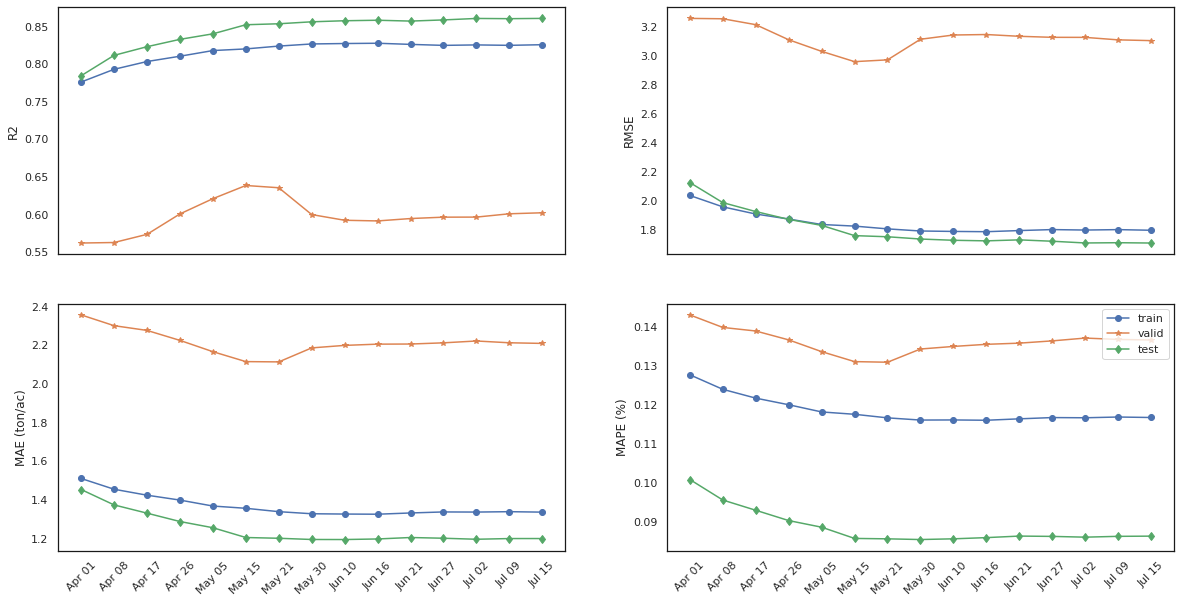

In [80]:
S2_train_df_Y1917 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1917_01_time_10m/S2_Y1917_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1917 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1917_01_time_10m/S2_Y1917_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1917  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1917_01_time_10m/S2_Y1917_01_time_10m_test.csv',  index_col=0) 
R_Y1917 = utils.time_series_2d_eval(S2_train_df_Y1917, S2_valid_df_Y1917, S2_test_df_Y1917, 'test', save = False)

In [88]:
S2_Y1917_BC = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1917_01_time_10m/S2_Y1917_01_time_10m_test_bc1.csv', index_col=0)
#S2_Y1917_B, S2_Y1917_C = utils.block_cultivar_test_csv_results_2d(S2_Y1917_BC, week = 'ypred_w15', 
#                                                                    save_dir = '/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1917_01_time_10m', 
#                                                                    save_csv_name = 'ConvLSTM_10m')

In [90]:
results_year2017 = year_wise_scenario2([S2_Y1617_BC, S2_Y1817_BC, S2_Y1917_BC])
print(f"Year 2017: MAE Mean = {results_year2017[0]}, MAE Std = {results_year2017[1]} ")
print(f"Year 2017: MAPE Mean = {results_year2017[2]}, MAPE Std= {results_year2017[3]} ")

Year 2017: MAE Mean = 1.4926858107695713, MAE Std = 0.2353700003464485 
Year 2017: MAPE Mean = 0.10667980500297113, MAPE Std= 0.019897160450147056 


#### Year 2018

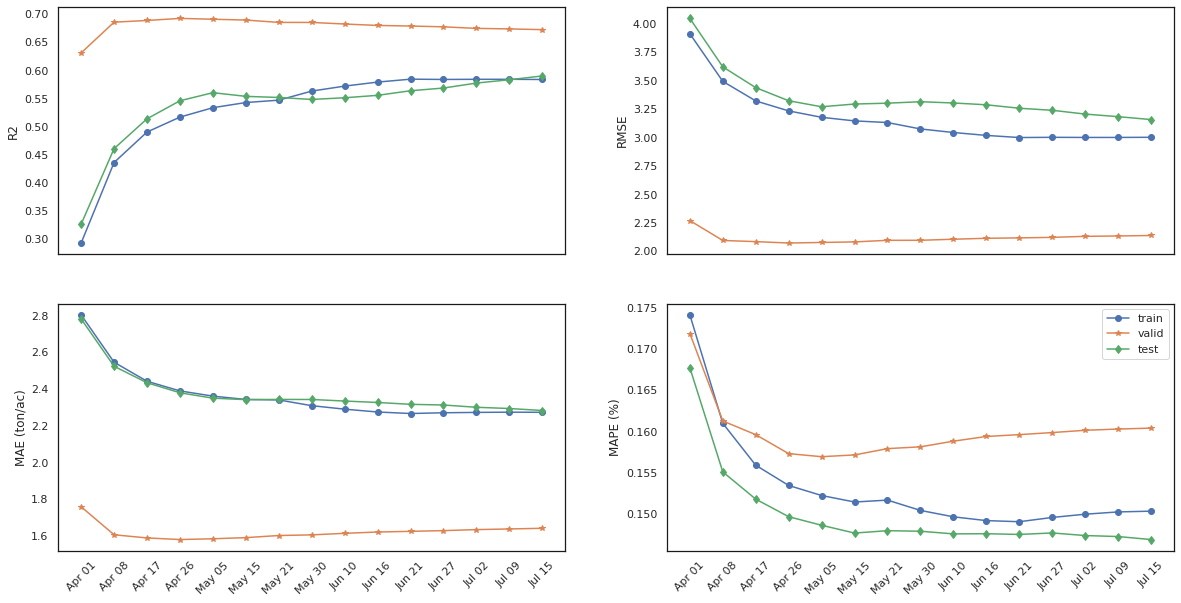

In [81]:
S2_train_df_Y1618 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1618_01_time_10m/S2_Y1618_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1618 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1618_01_time_10m/S2_Y1618_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1618  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1618_01_time_10m/S2_Y1618_01_time_10m_test.csv',  index_col=0) 
R_Y1618 = utils.time_series_2d_eval(S2_train_df_Y1618, S2_valid_df_Y1618, S2_test_df_Y1618, 'test', save = False)

In [91]:
S2_Y1618_BC = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1618_01_time_10m/S2_Y1618_01_time_10m_test_bc1.csv', index_col=0)
#S2_Y1618_B, S2_Y1618_C = utils.block_cultivar_test_csv_results_2d(S2_Y1618_BC, week = 'ypred_w15', 
#                                                                    save_dir = '/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1618_01_time_10m', 
#                                                                    save_csv_name = 'ConvLSTM_10m')

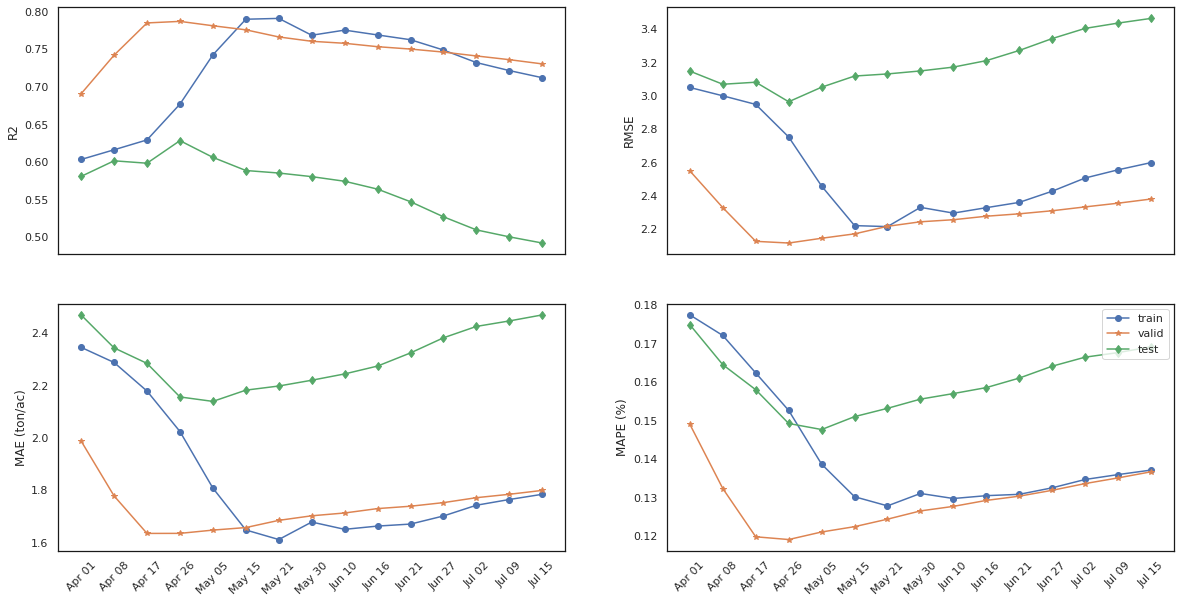

In [82]:
S2_train_df_Y1718 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1718_01_time_10m/S2_Y1718_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1718 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1718_01_time_10m/S2_Y1718_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1718  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1718_01_time_10m/S2_Y1718_01_time_10m_test.csv',  index_col=0) 
R_Y1718 = utils.time_series_2d_eval(S2_train_df_Y1718, S2_valid_df_Y1718, S2_test_df_Y1718, 'test', save = False)

In [92]:
S2_Y1718_BC = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1718_01_time_10m/S2_Y1718_01_time_10m_test_bc1.csv', index_col=0)
#S2_Y1718_B, S2_Y1718_C = utils.block_cultivar_test_csv_results_2d(S2_Y1718_BC, week = 'ypred_w15', 
#                                                                    save_dir = '/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1718_01_time_10m', 
#                                                                    save_csv_name = 'ConvLSTM_10m')

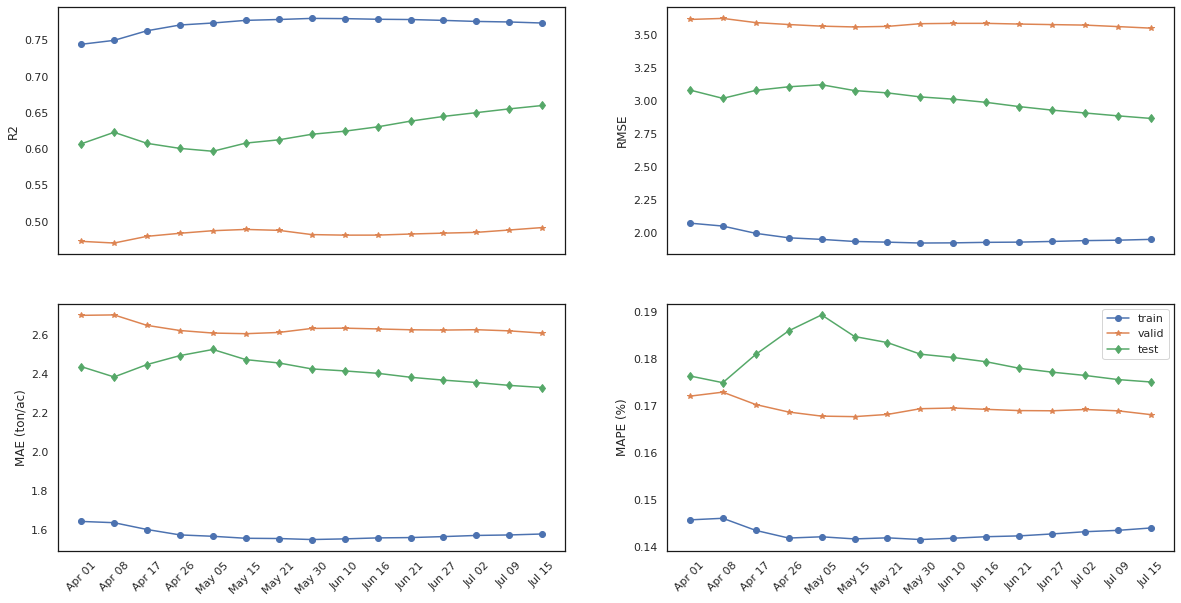

In [83]:
S2_train_df_Y1918 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1918_01_time_10m/S2_Y1918_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1918 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1918_01_time_10m/S2_Y1918_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1918  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1918_01_time_10m/S2_Y1918_01_time_10m_test.csv',  index_col=0) 
R_Y1918 = utils.time_series_2d_eval(S2_train_df_Y1918, S2_valid_df_Y1918, S2_test_df_Y1918, 'test', save = False)

In [94]:
S2_Y1918_BC = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1918_01_time_10m/S2_Y1918_01_time_10m_test_bc1.csv', index_col=0)
#S2_Y1918_B, S2_Y1918_C = utils.block_cultivar_test_csv_results_2d(S2_Y1918_BC, week = 'ypred_w15', 
#                                                                    save_dir = '/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1918_01_time_10m', 
#                                                                    save_csv_name = 'ConvLSTM_10m')

In [95]:
results_year2018 = year_wise_scenario2([S2_Y1618_BC, S2_Y1718_BC, S2_Y1918_BC])
print(f"Year 2018: MAE Mean = {results_year2018[0]}, MAE Std = {results_year2018[1]} ")
print(f"Year 2018: MAPE Mean = {results_year2018[2]}, MAPE Std= {results_year2018[3]} ")

Year 2018: MAE Mean = 2.361246069605747, MAE Std = 0.07900506077243628 
Year 2018: MAPE Mean = 0.1637138737152827, MAPE Std= 0.012167157244254588 


####  Year 2019

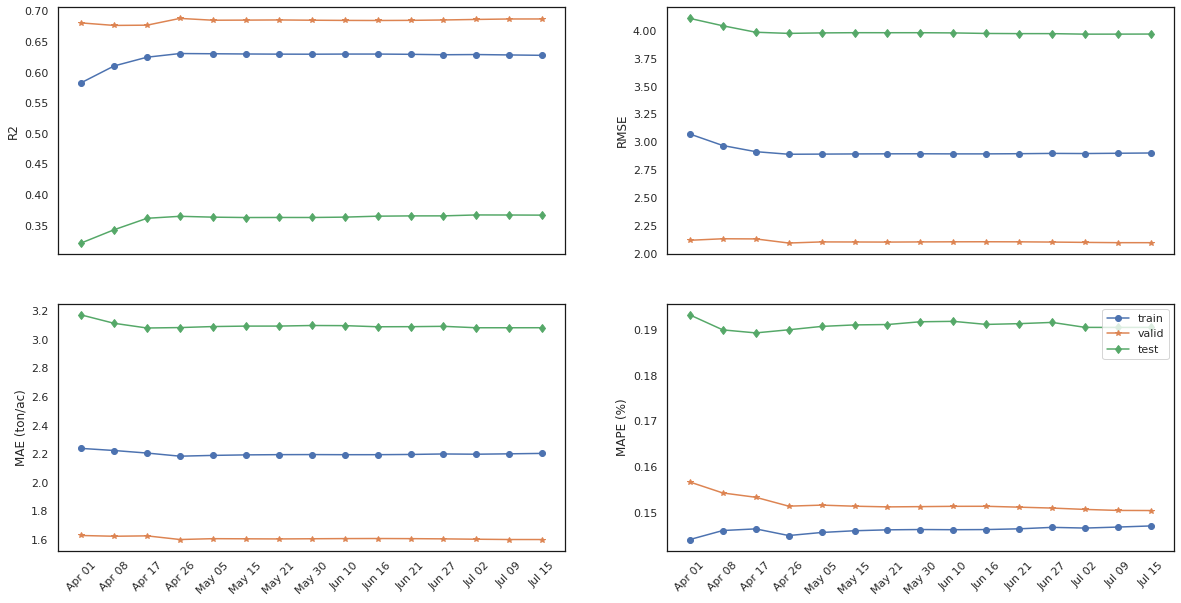

In [84]:
S2_train_df_Y1619 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1619_01_time_10m/S2_Y1619_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1619 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1619_01_time_10m/S2_Y1619_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1619  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1619_01_time_10m/S2_Y1619_01_time_10m_test.csv',  index_col=0) 
R_Y1619 = utils.time_series_2d_eval(S2_train_df_Y1619, S2_valid_df_Y1619, S2_test_df_Y1619, 'test', save = False)

In [96]:
S2_Y1619_BC = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1619_01_time_10m/S2_Y1619_01_time_10m_test_bc1.csv', index_col=0)
#S2_Y1619_B, S2_Y1619_C = utils.block_cultivar_test_csv_results_2d(S2_Y1619_BC, week = 'ypred_w15', 
#                                                                    save_dir = '/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1619_01_time_10m', 
#                                                                    save_csv_name = 'ConvLSTM_10m')

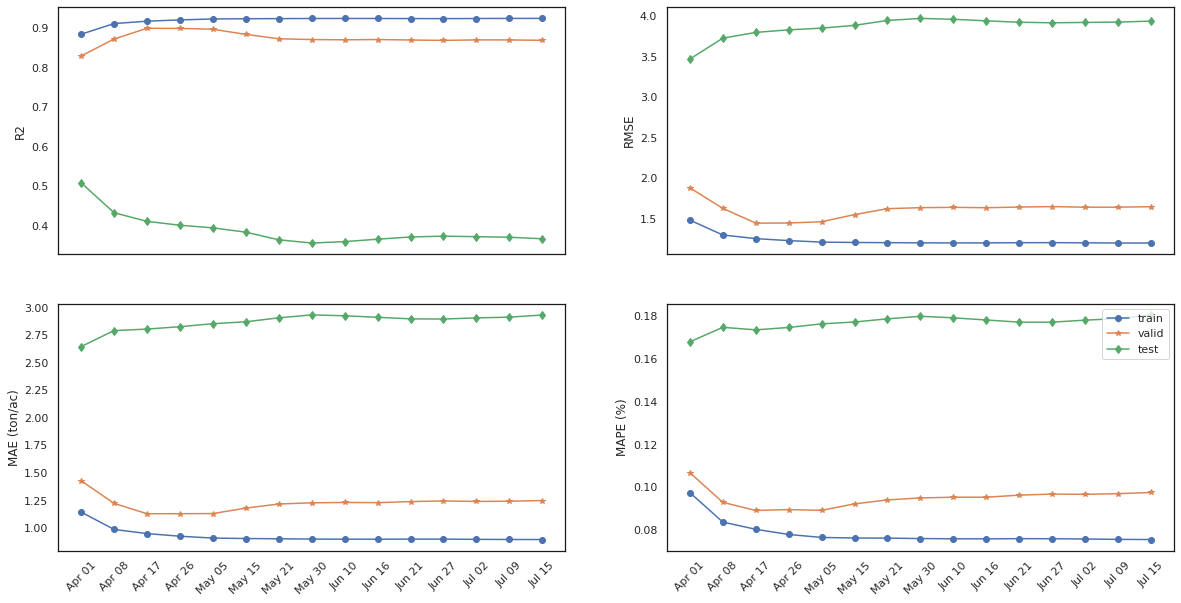

In [85]:
S2_train_df_Y1719 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1719_01_time_10m/S2_Y1719_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1719 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1719_01_time_10m/S2_Y1719_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1719  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1719_01_time_10m/S2_Y1719_01_time_10m_test.csv',  index_col=0) 
R_Y1719 = utils.time_series_2d_eval(S2_train_df_Y1719, S2_valid_df_Y1719, S2_test_df_Y1719, 'test', save = False)

In [97]:
S2_Y1719_BC = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1719_01_time_10m/S2_Y1719_01_time_10m_test_bc1.csv', index_col=0)
#S2_Y1719_B, S2_Y1719_C = utils.block_cultivar_test_csv_results_2d(S2_Y1719_BC, week = 'ypred_w15', 
#                                                                    save_dir = '/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1719_01_time_10m', 
#                                                                    save_csv_name = 'ConvLSTM_10m')

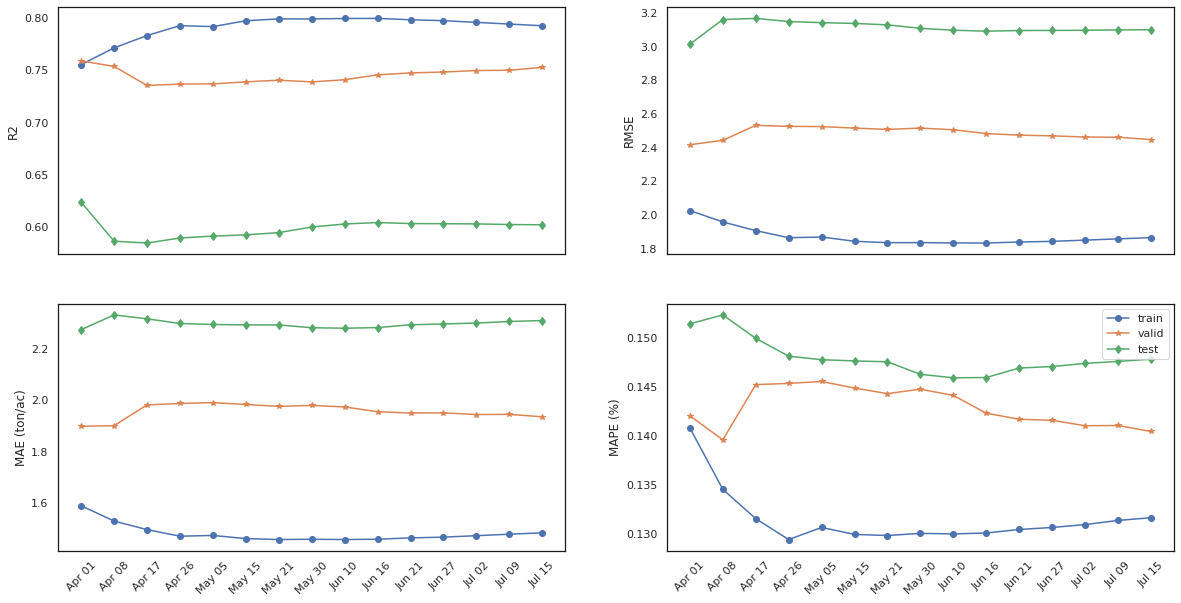

In [86]:
S2_train_df_Y1819 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1819_01_time_10m/S2_Y1819_01_time_10m_train.csv', index_col=0)
S2_valid_df_Y1819 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1819_01_time_10m/S2_Y1819_01_time_10m_valid.csv', index_col=0) 
S2_test_df_Y1819  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1819_01_time_10m/S2_Y1819_01_time_10m_test.csv',  index_col=0) 
R_Y1819 = utils.time_series_2d_eval(S2_train_df_Y1819, S2_valid_df_Y1819, S2_test_df_Y1819, 'test', save = False)

In [98]:
S2_Y1819_BC = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1819_01_time_10m/S2_Y1819_01_time_10m_test_bc1.csv', index_col=0)
#S2_Y1819_B, S2_Y1819_C = utils.block_cultivar_test_csv_results_2d(S2_Y1819_BC, week = 'ypred_w15', 
#                                                                    save_dir = '/data2/hkaman/Livingston/EXPs/10m/EXP_S2_Y1819_01_time_10m', 
#                                                                    save_csv_name = 'ConvLSTM_10m')

In [99]:
results_year2019 = year_wise_scenario2([S2_Y1619_BC, S2_Y1719_BC, S2_Y1819_BC])
print(f"Year 2019: MAE Mean = {results_year2019[0]}, MAE Std = {results_year2019[1]} ")
print(f"Year 2019: MAPE Mean = {results_year2019[2]}, MAPE Std= {results_year2019[3]} ")

Year 2019: MAE Mean = 2.775426213898194, MAE Std = 0.33574270530381817 
Year 2019: MAPE Mean = 0.172963391210565, MAPE Std= 0.018225915546400198 


In [38]:
def S2_block_mean(list_of_block_df):
    output = pd.DataFrame()
    blocks = [3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 
    25, 26, 32, 50, 58, 62, 68, 70, 76, 77, 89, 90, 102, 103, 
    105, 107, 111, 114, 128, 135, 176, 177, 178, 181, 186, 193]
    names, MAE_M, MAE_S, MAPE_M, MAPE_S = [], [], [], [], []
    for b in blocks: 
        #print(b)
        MAE_value, MAPE_value = [], []
        

        for df in list_of_block_df: 
            for i in range(len(df)):
                block_name = str(df.iloc[i]['block'])
                name_split = os.path.split(block_name)[-1]
                root_name = name_split.replace(name_split[-4:], '')
                
                if b == int(root_name):
 
                    MAE_value.append(df.iloc[i]['MAE'])
                    MAPE_value.append(df.iloc[i]['MAPE'])
        
        #print(f"{b}: {np.mean(MAE_value)} | {np.mean(MAPE_value)}")
        names.append(b)
        
        MAE_M.append(np.mean(MAE_value))
        MAE_S.append(np.std(MAE_value))
        MAPE_M.append(np.mean(MAPE_value))
        MAPE_S.append(np.std(MAPE_value))




    output['block'] = names
    output['MAE_M'] = MAE_M
    output['MAE_S'] = MAE_S
    output['MAPE_M'] = MAPE_M
    output['MAPE_S'] = MAPE_S

    return output


def S2_cultivar_mean(list_of_cultivar_df):
    c = ['CABERNET_SAUVIGNON', 'CHARDONNAY', 'MALVASIA_BIANCA', 'MERLOT', 'MUSCAT_OF_ALEXANDRIA', 'RIESLING', 'SYMPHONY', 'SYRAH']
    output = pd.DataFrame()

    names, MAE_M, MAE_S, MAPE_M, MAPE_S = [], [], [], [], []
    for cul in c:
        MAE_value, MAPE_value = [], []

        for df in list_of_cultivar_df: 
            for i in range(len(df)):
                cname = str(df.iloc[i]['cultivar'])
                
                if cul == cname: 

                    MAE_value.append(df.iloc[i]['MAE'])
                    MAPE_value.append(df.iloc[i]['MAPE'])
    
    #print(f"{b}: {np.mean(MAE_value)} | {np.mean(MAPE_value)}")
        names.append(cul)
        
        MAE_M.append(np.mean(MAE_value))
        MAE_S.append(np.std(MAE_value))
        MAPE_M.append(np.mean(MAPE_value))
        MAPE_S.append(np.std(MAPE_value))




    output['block'] = names
    output['MAE_M'] = MAE_M
    output['MAE_S'] = MAE_S
    output['MAPE_M'] = MAPE_M
    output['MAPE_S'] = MAPE_S

    return output

In [26]:
S2_list_of_blocks_df = [S2_Y1716_B, S2_Y1816_B, S2_Y1916_B,
S2_Y1617_B, S2_Y1817_B, S2_Y1917_B,
S2_Y1618_B, S2_Y1718_B, S2_Y1918_B,
S2_Y1619_B, S2_Y1719_B, S2_Y1819_B]

S2_blocks_mean_std = S2_block_mean(S2_list_of_blocks_df)
S2_blocks_mean_std

,block,MAE_M,MAE_S,MAPE_M,MAPE_S
0,3,0.945000,0.431499,0.116667,0.055578
1,5,1.525556,0.494213,0.131111,0.059150
2,6,2.055000,1.187929,0.246667,0.144010
3,7,5.791667,2.354152,0.284167,0.138832
4,8,1.073333,0.518352,0.123333,0.058500
5,10,1.693333,0.958309,0.180000,0.092256
6,11,1.553333,0.833480,0.166667,0.080966
7,12,1.243333,0.659284,0.125000,0.075993
8,13,1.281667,0.532241,0.119167,0.050408
9,14,2.650000,1.063673,0.175833,0.060616


In [39]:
S2_list_of_cultivars_df = [S2_Y1716_C, S2_Y1816_C, S2_Y1916_C,
S2_Y1617_C, S2_Y1817_C, S2_Y1917_C,
S2_Y1618_C, S2_Y1718_C, S2_Y1918_C,
S2_Y1619_C, S2_Y1719_C, S2_Y1819_C]
S2_cultivars_mean_std = S2_cultivar_mean(S2_list_of_cultivars_df)
S2_cultivars_mean_std

,block,MAE_M,MAE_S,MAPE_M,MAPE_S
0,CABERNET_SAUVIGNON,1.416667,0.463435,0.138333,0.061351
1,CHARDONNAY,1.936667,0.963495,0.172500,0.064823
2,MALVASIA_BIANCA,1.392500,0.612306,0.170000,0.086120
3,MERLOT,1.304444,0.587993,0.140000,0.058878
4,MUSCAT_OF_ALEXANDRIA,3.797500,1.694570,0.195833,0.073876
5,RIESLING,2.904167,0.936425,0.210833,0.080567
6,SYMPHONY,4.192500,1.677762,0.233333,0.113309
7,SYRAH,1.302500,0.507939,0.129167,0.057512


In [87]:
df2016 = utils.concat_year_s2(R_Y1716, R_Y1816, R_Y1916)
df2017 = utils.concat_year_s2(R_Y1617, R_Y1817, R_Y1917)
df2018 = utils.concat_year_s2(R_Y1618, R_Y1718, R_Y1918)
df2019 = utils.concat_year_s2(R_Y1619, R_Y1719, R_Y1819)
S2_all = utils.S2_mean_eval(df2016, df2017, df2018, df2019)

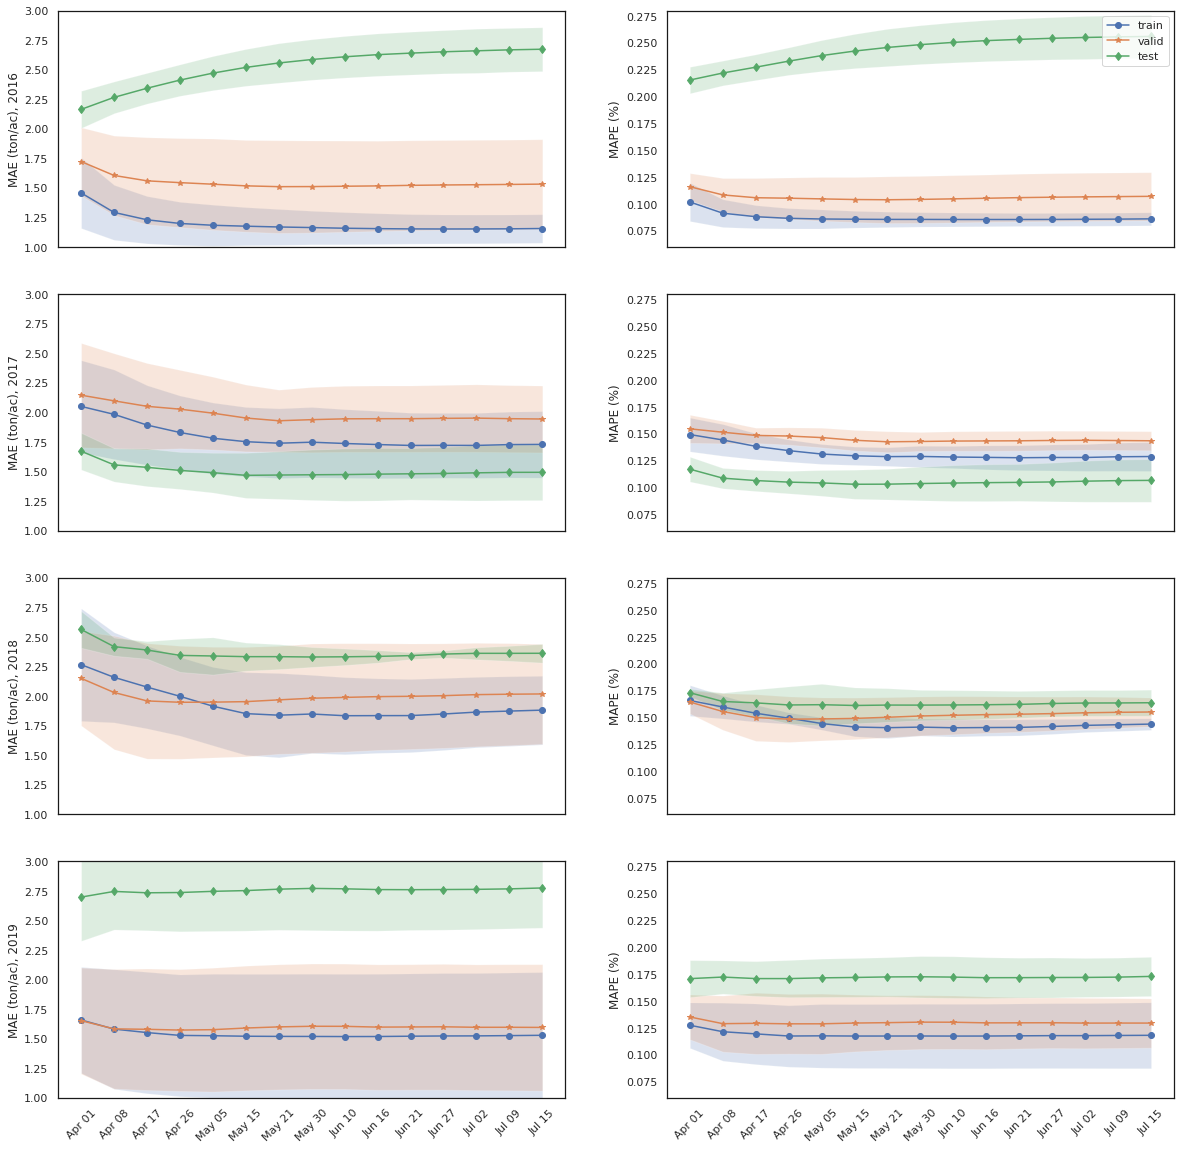

In [94]:
_ = utils.time_series_2d_eval_S2(df2016, df2017, df2018, df2019)

In [121]:
test_scatter_s2 = pd.concat([S2_test_df_Y1716, S2_test_df_Y1816, S2_test_df_Y1916, 
S2_test_df_Y1617, S2_test_df_Y1817, S2_test_df_Y1917, 
S2_test_df_Y1618, S2_test_df_Y1718, S2_test_df_Y1918, 
S2_test_df_Y1619, S2_test_df_Y1719, S2_test_df_Y1819])

## Scenario 3

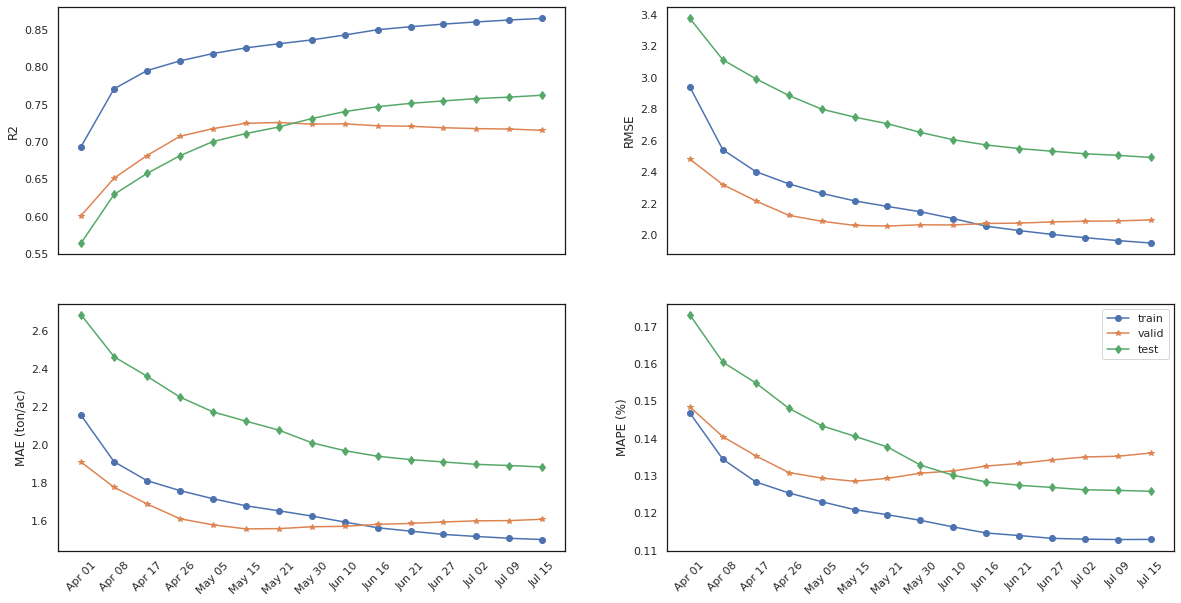

In [88]:
S3_train_df_10m = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_train.csv', index_col=0)
S3_valid_df_10m = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_valid.csv', index_col=0) 
S3_test_df_10m  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_test.csv',  index_col=0) 

S3_fig_save_name_01 = '/data2/hkaman/Livingston/EXPs/EXP_S3_UNetLSTM_10m/S3_timeseries_10m.png'
S3_R = utils.time_series_2d_eval(S3_train_df_10m, S3_valid_df_10m, S3_test_df_10m, S3_fig_save_name_01, save = False)

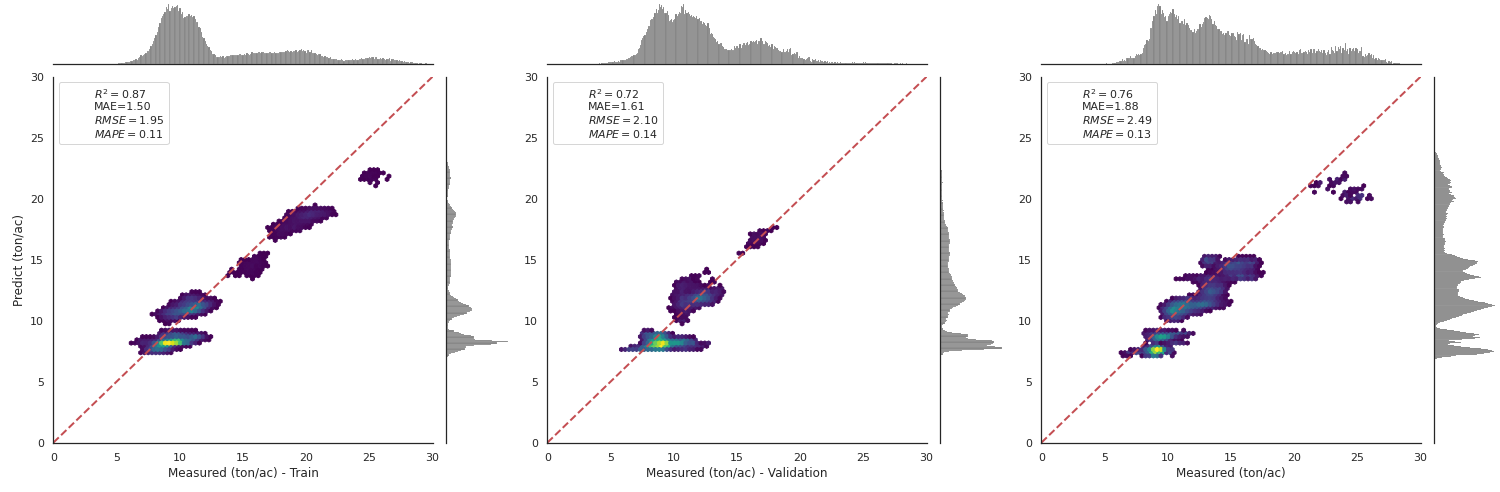

In [7]:
_ = utils.train_val_test_satterplot(S3_train_df_10m, S3_valid_df_10m, S3_test_df_10m, week = 15, cmap  = 'viridis', mincnt = 2000)

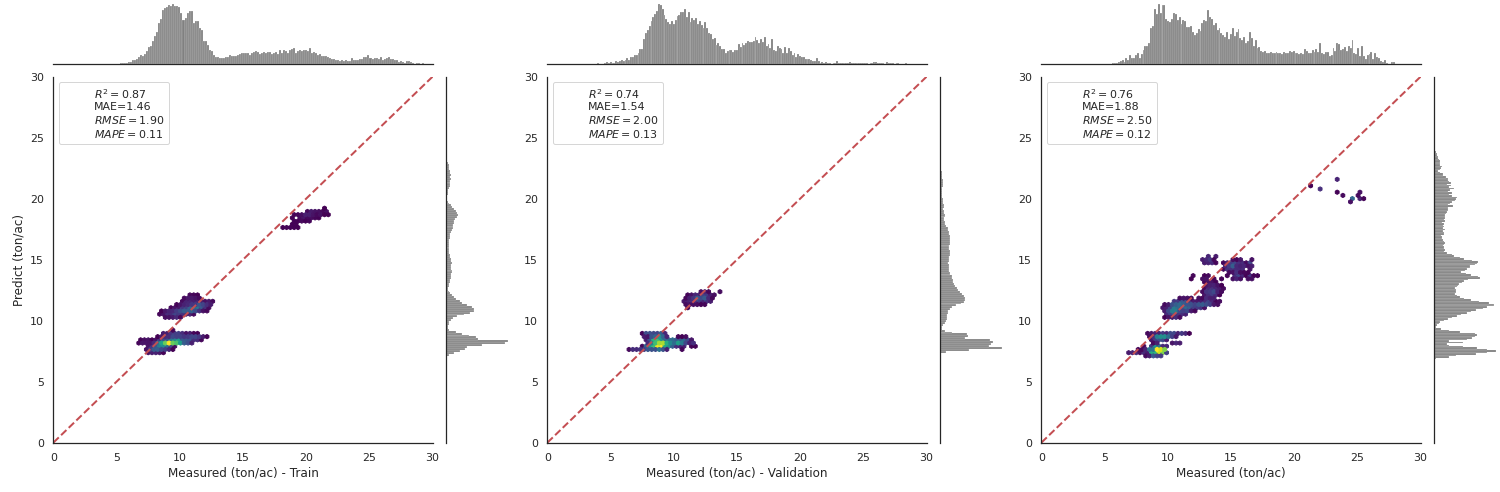

In [22]:
S3_train_df_20 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_train_20m.csv', index_col=0)
S3_valid_df_20 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_valid_20m.csv', index_col=0) 
S3_test_df_20  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_test_20m.csv',  index_col=0) 

_ = utils.train_val_test_satterplot(S3_train_df_20, S3_valid_df_20, S3_test_df_20, week = 15, cmap  = 'viridis', mincnt = 1000)

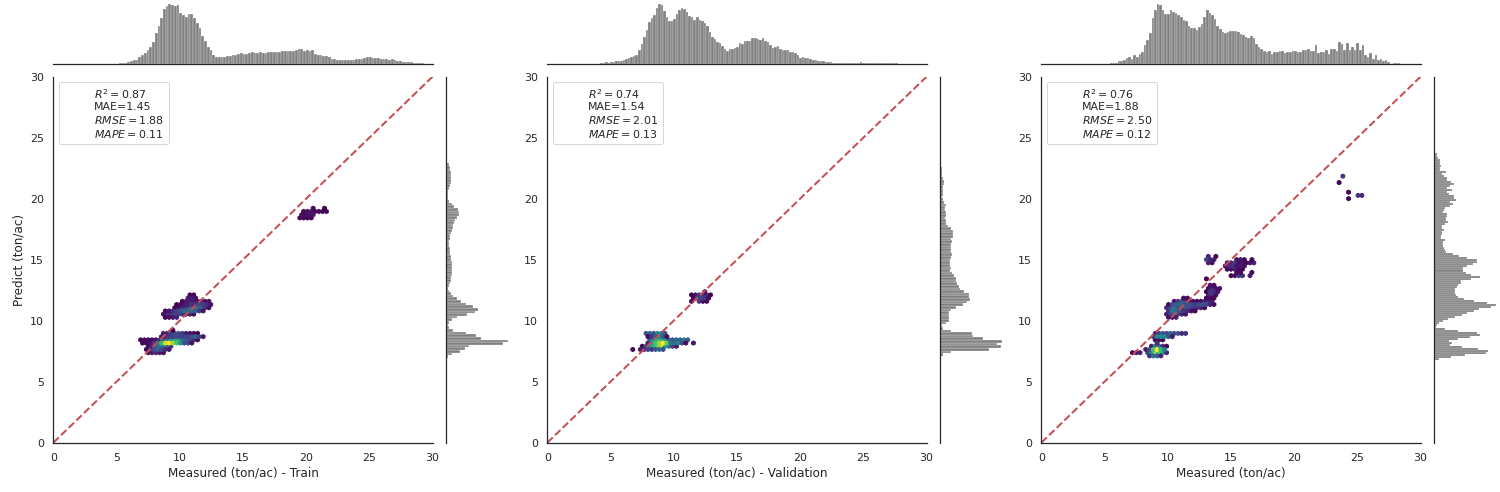

In [23]:
S3_train_df_30 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_train_30m.csv', index_col=0)
S3_valid_df_30 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_valid_30m.csv', index_col=0) 
S3_test_df_30  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_test_30m.csv',  index_col=0) 

_ = utils.train_val_test_satterplot(S3_train_df_30, S3_valid_df_30, S3_test_df_30, week = 15, cmap  = 'viridis', mincnt = 500)

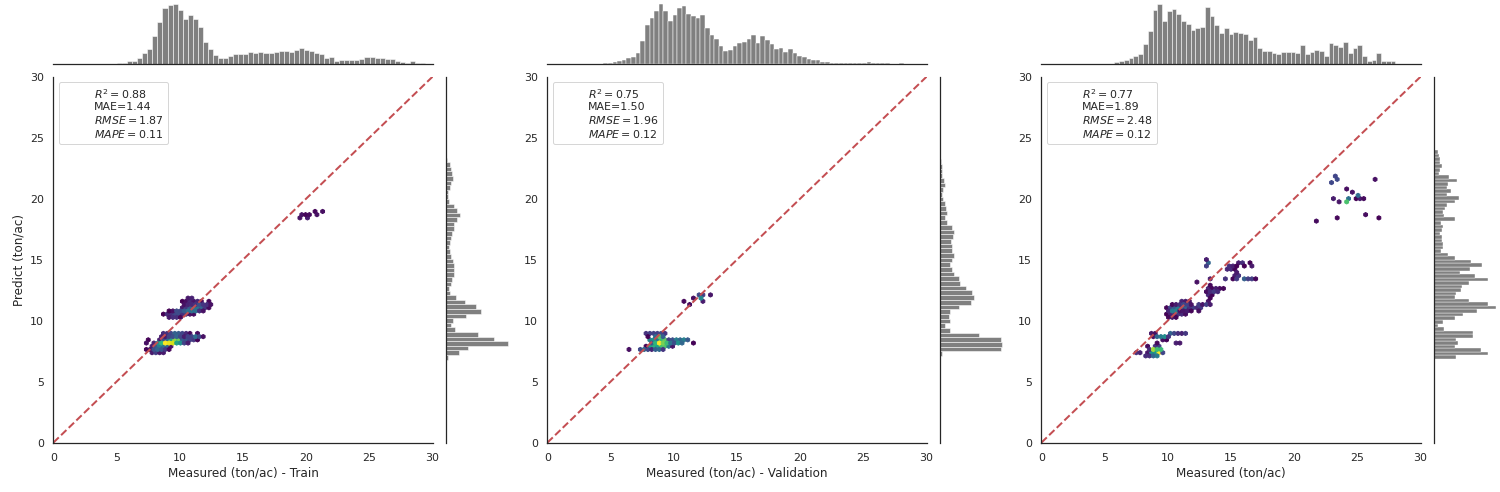

In [24]:
S3_train_df_60 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_train_60m.csv', index_col=0)
S3_valid_df_60 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_valid_60m.csv', index_col=0) 
S3_test_df_60  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_test_60m.csv',  index_col=0) 

_ = utils.train_val_test_satterplot(S3_train_df_60, S3_valid_df_60, S3_test_df_60, week = 15, cmap  = 'viridis', mincnt = 100)

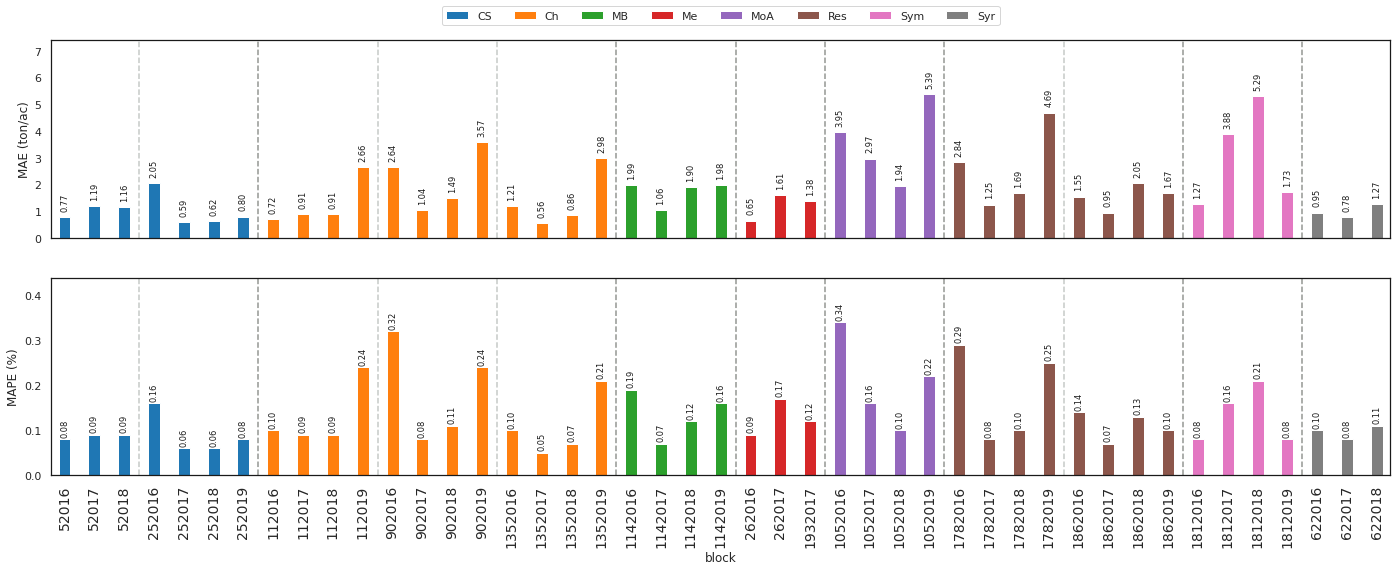

In [4]:
BC_S3 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_test_bc1.csv', index_col=0)
S3_time_blocks, S3_time_cultivars = utils.block_cultivar_test_csv_results_2d(BC_S3, week = 'ypred_w15', save_dir = '/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time', save_csv_name = 'ConvLSTM_10m_time_')

_ = utils.block_eval_barplot_S3(S3_time_blocks, cultivar_list = None, block_list = None)

In [78]:
source_s3 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_test_bc1.csv')

Years, MAE_Years_S3, MAPE_Years_S3 = year_wise_scenarios(source_s3)

print(f"Year {Years[0]}: MAE = {MAE_Years_S3[0]}, MAPE = {MAPE_Years_S3[0]} ")
print(f"Year {Years[1]}: MAE = {MAE_Years_S3[1]}, MAPE = {MAPE_Years_S3[1]} ")
print(f"Year {Years[2]}: MAE = {MAE_Years_S3[2]}, MAPE = {MAPE_Years_S3[2]} ")
print(f"Year {Years[3]}: MAE = {MAE_Years_S3[3]}, MAPE = {MAPE_Years_S3[3]} ")

Year 2016: MAE = 1.4660346193704166, MAPE = 0.1392906081606506 
Year 2017: MAE = 1.4201623197857611, MAPE = 0.1134925196537887 
Year 2018: MAE = 2.171522490971365, MAPE = 0.12064126724149489 
Year 2019: MAE = 2.558686827879526, MAPE = 0.14747781925582693 


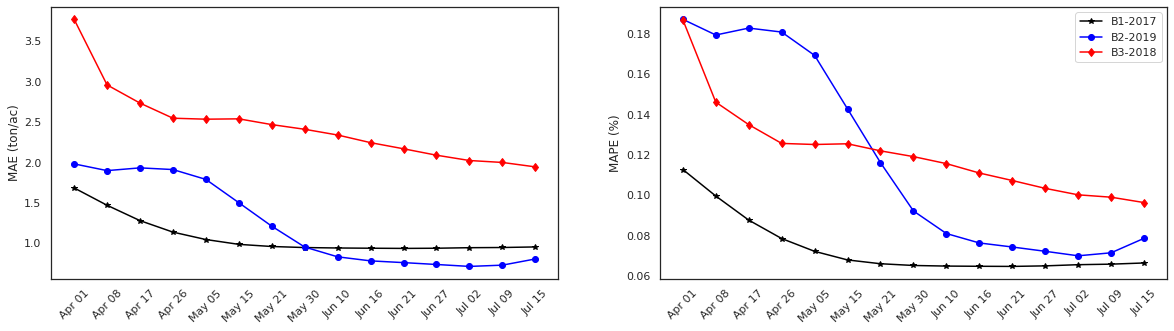

In [18]:
S3_blocks = BC_S3.groupby(by = 'block')

B1 = S3_blocks.get_group(1862017)
B2 = S3_blocks.get_group(252019)
B3 = S3_blocks.get_group(1052018)

_ = utils.thriple_time_series_block_eval(B1, B2, B3)

(46080, 21)
(54, 78)
inside: (44, 68)|(54, 78)


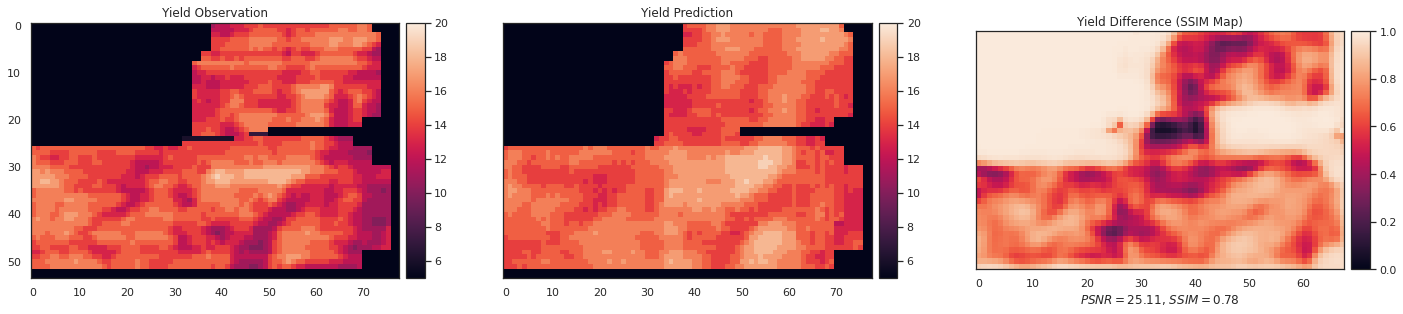

In [19]:
this_block_df, ytrue, ypred = utils.block_true_pred_mtx(BC_S3, 1862017, aggregation = False, spatial_resolution = 10)
_= utils.yield_true_pred_plot(ytrue, ypred, min_v = 5, max_v = 20)

(46080, 20)


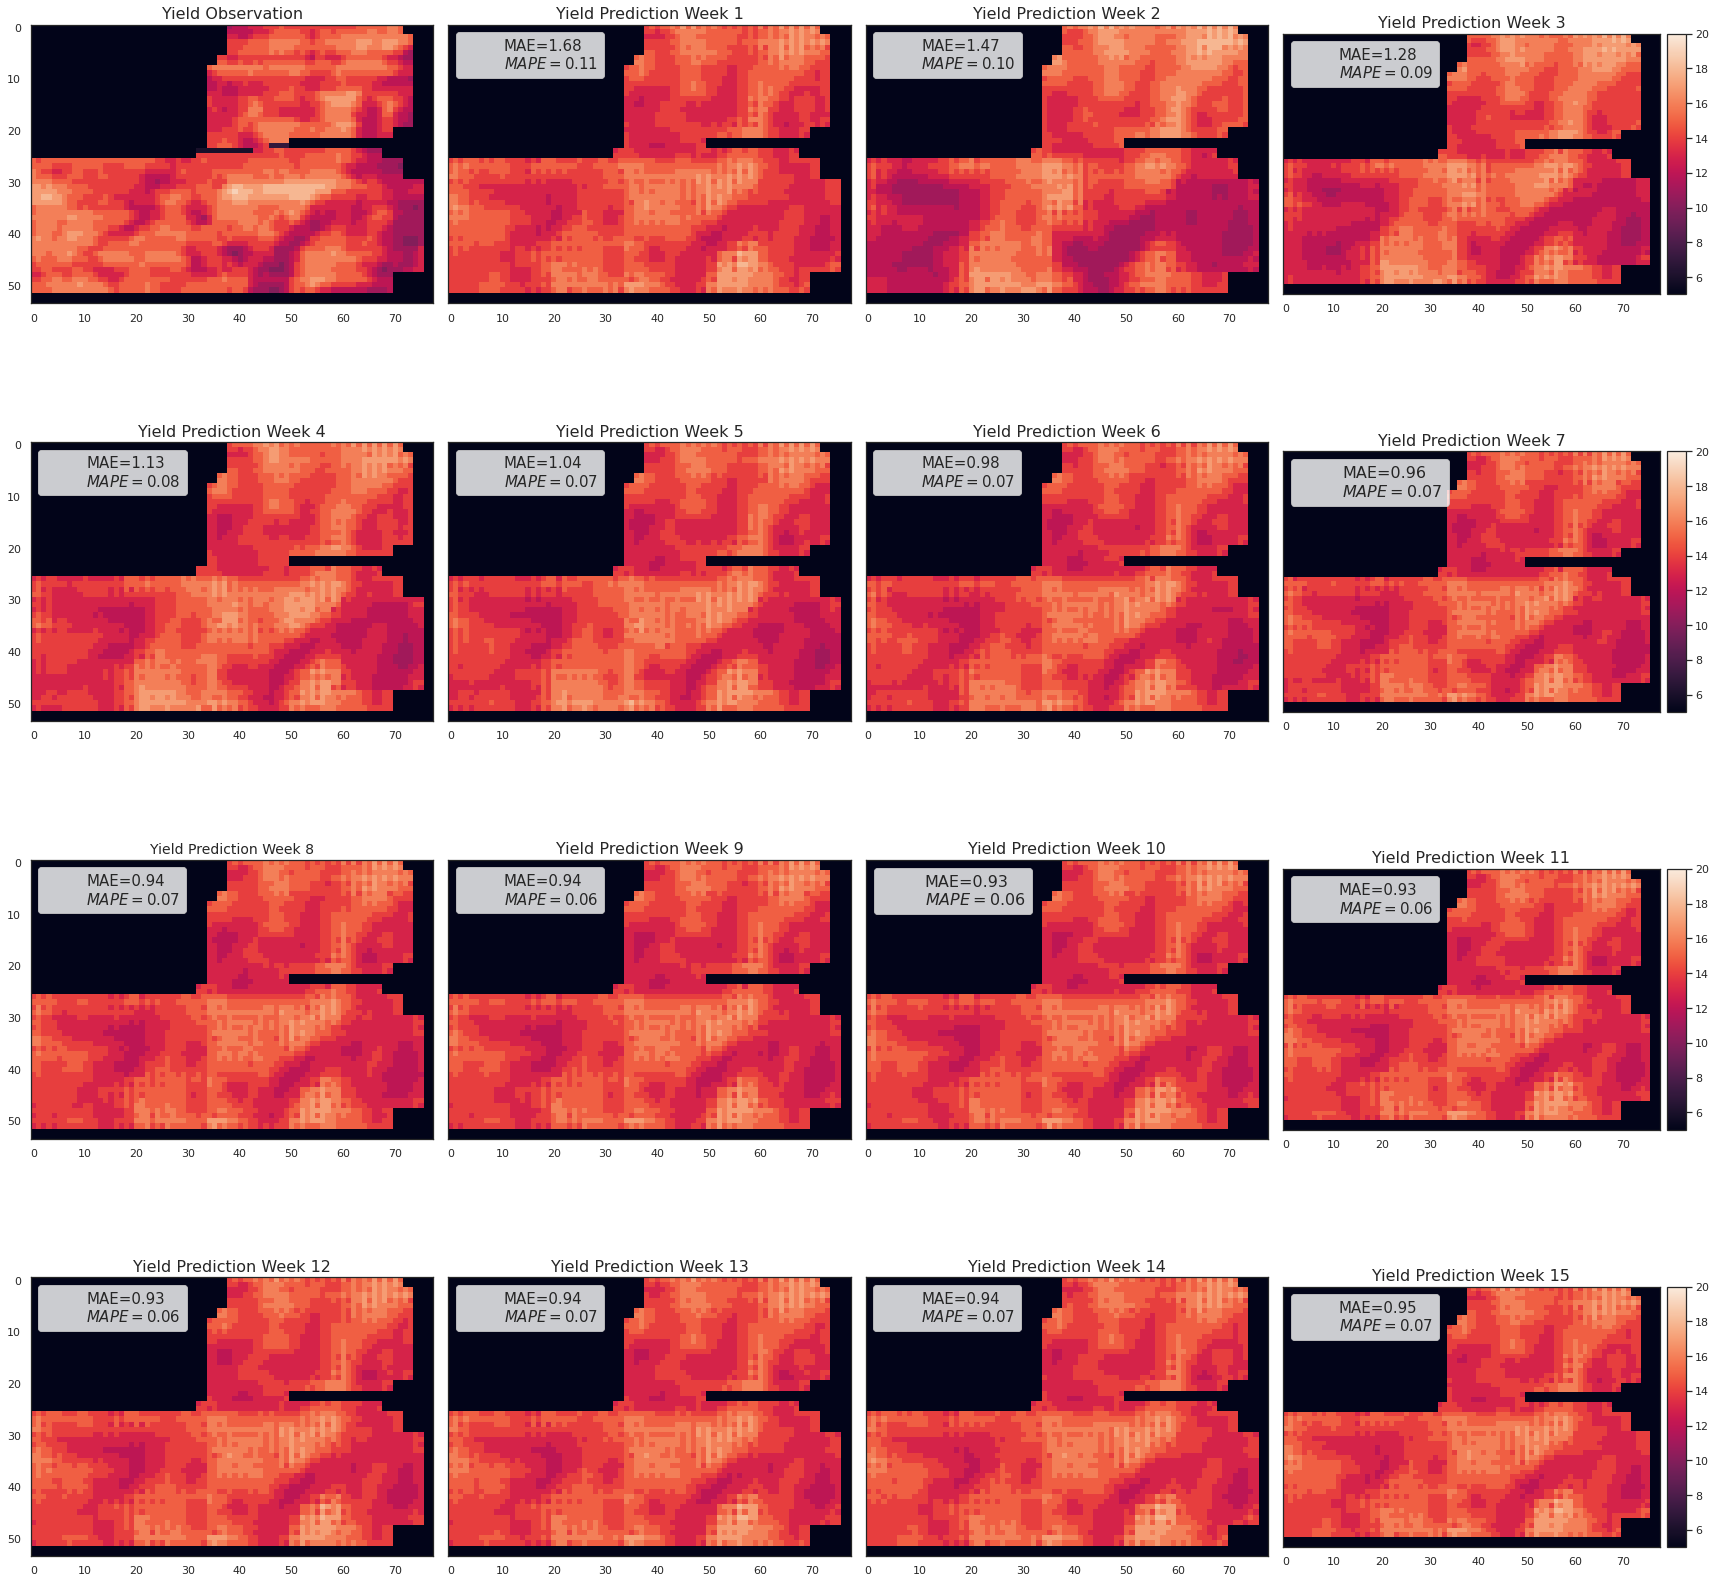

In [10]:
BC_S3 = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_test_bc1.csv', index_col=0)
df_1862017 = utils.block_true_pred_mtx_timeseries(BC_S3, 1862017, aggregation = None, spatial_resolution  = 10)

In [72]:
this_block_df, ytrue, ypred = utils.block_true_pred_mtx(BC_S3, 1862017, aggregation = False, spatial_resolution = 10)

(46080, 20)


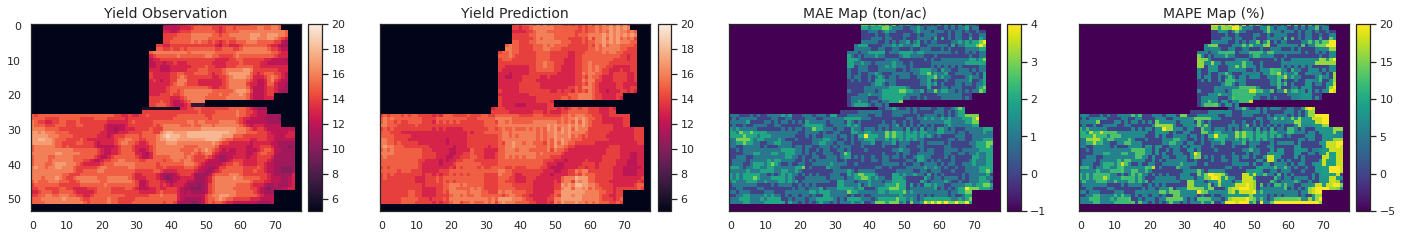

In [73]:
_ = utils.yield_true_pred_plot(ytrue, ypred, min_v = 5, max_v = 20)

(33536, 20)


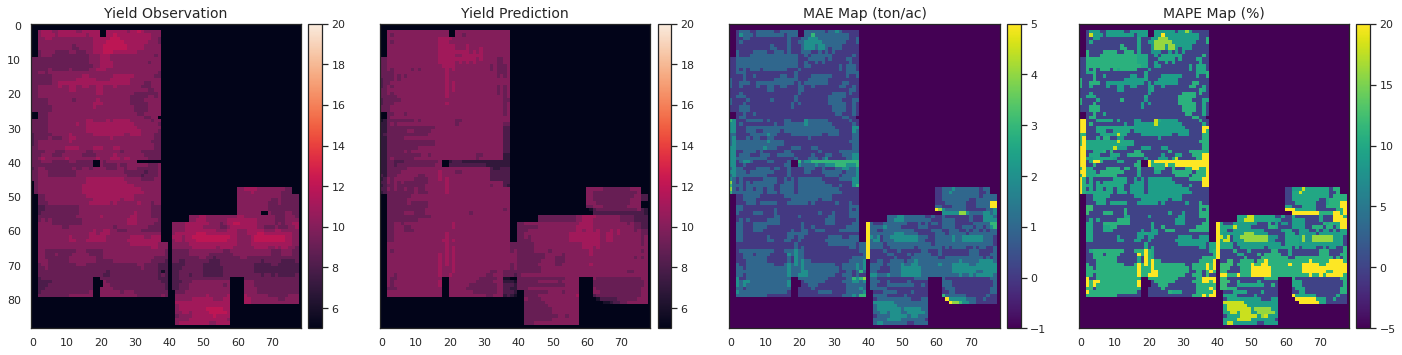

In [71]:
this_block_df, ytrue, ypred = utils.block_true_pred_mtx(BC_S3, 252019, aggregation = False, spatial_resolution = 10) 
_ = utils.yield_true_pred_plot(ytrue, ypred, min_v = 5, max_v = 20)

(192256, 20)


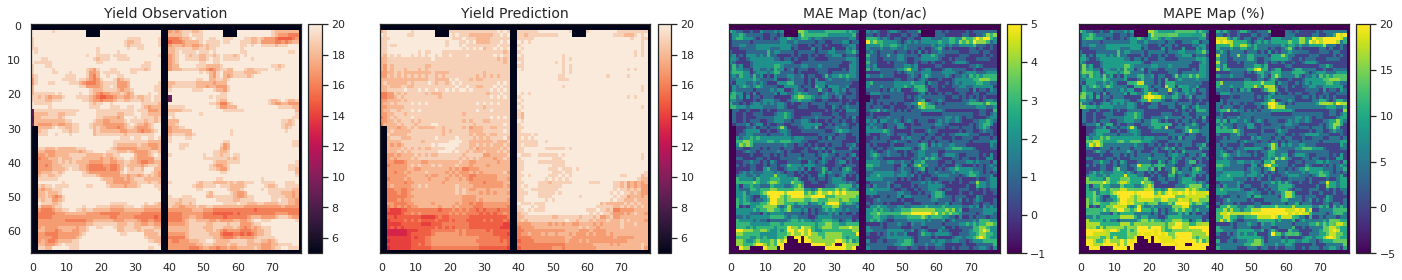

In [67]:
this_block_df, ytrue, ypred = utils.block_true_pred_mtx(BC_S3, 1052018, aggregation = False, spatial_resolution = 10)
_= utils.yield_true_pred_plot(ytrue, ypred, min_v = 5, max_v = 20)

In [ ]:
S3_df2d = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m/S3_UNetLSTM_10m_test_bc1.csv', index_col=0)
S3_blocks, S3_cultivars = utils.block_cultivar_test_csv_results_2d(S3_df2d, week = 'ypred_w15', save_dir = '/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m', save_csv_name = 'ConvLSTM_10m')
this_block_df, ytrue, ypred = utils.block_true_pred_mtx(S3_df2d, 1862017, aggregation = False, spatial_resolution = 10)
_ = utils.time_series_block_eval(this_block_df, block_id = 'Block 186-2017')

## Overall analysis on 10m performance: 

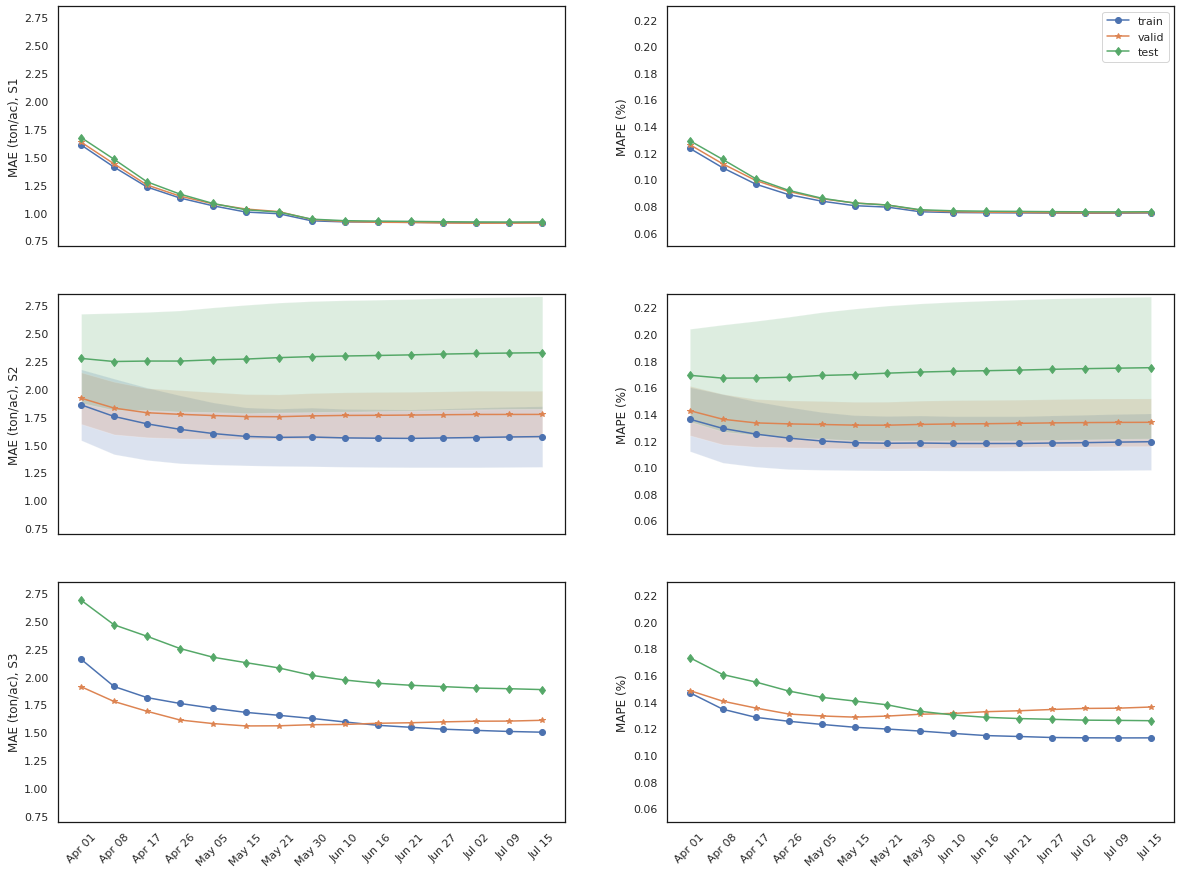

In [93]:
_ = utils.timeseries_10m_all(R_S1, S2_all, S3_R)

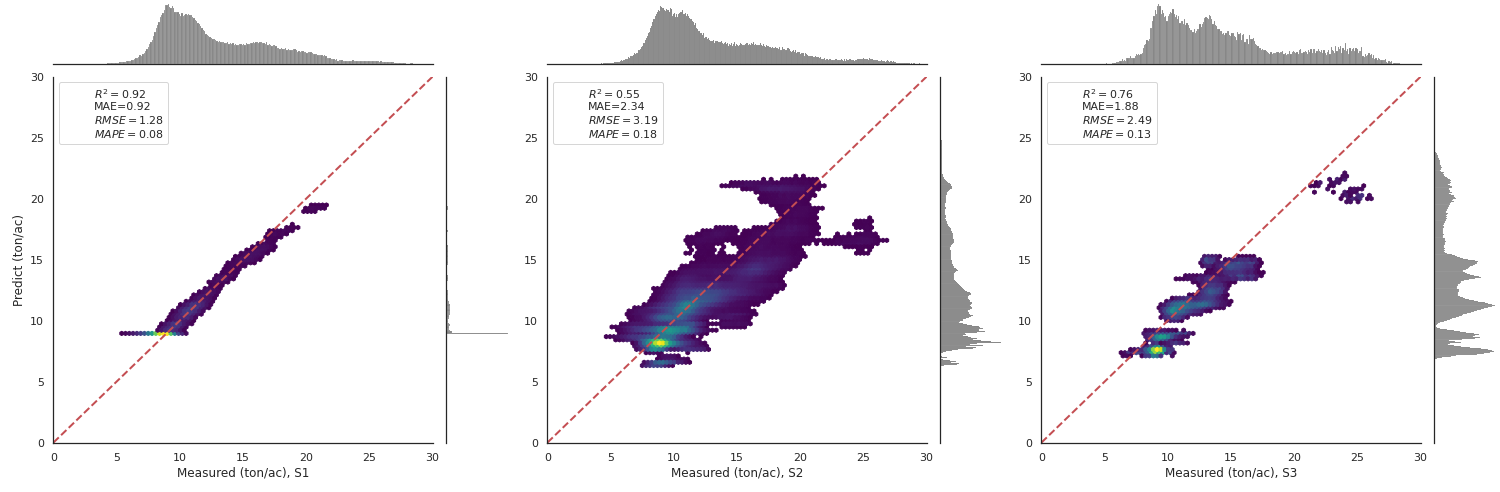

In [135]:
_ = utils.scenarios_satterplot(S1_test_df, test_scatter_s2, S3_test_df_01, week = 15, cmap  = 'viridis', mincnt = 2000)

## Blockwise evaluation 

In [8]:
params = {'legend.fontsize': 14,
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':13,
         'ytick.labelsize':13}
plt.rcParams.update(params)

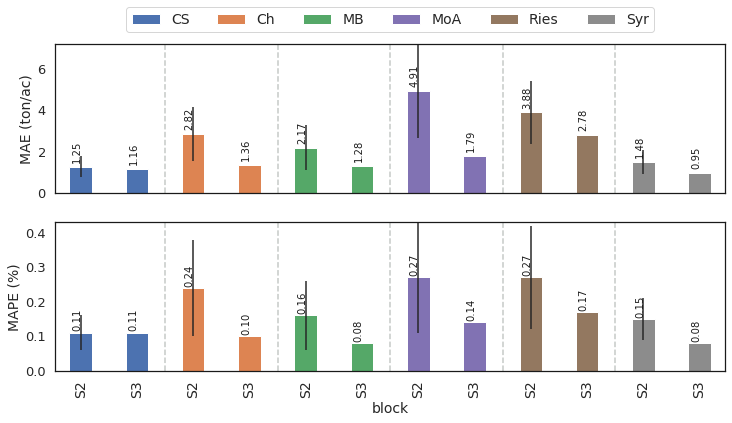

In [9]:
df = pd.DataFrame()

'''blocks    = [252019, 252019, 252019, 
            902017, 902017, 902017, 
            1142017, 1142017, 1142017, 
            1052019, 1052019, 1052019, 
            1782018, 1782018, 1782018,
            622018, 622018, 622018]'''
blocks    = [252019, 252019, 
            902017, 902017, 
            1142017, 1142017, 
            1052019, 1052019, 
            1782018, 1782018,
            622018, 622018]
cultivars = ['CS', 'CS', 
            'Ch', 'Ch', 
            'MB','MB', 
            'MoA', 'MoA', 
            'Ries', 'Ries', 
            'Syr', 'Syr']

'''MAE       = [0.52, 1.25, 1.16,  
            0.68, 2.82, 1.36,  
            0.71, 2.17, 1.28,  
            2.10, 4.91, 1.79, 
            1.21, 3.88, 2.78, 
            0.55, 1.48, 0.95]'''
MAE       = [1.25, 1.16,  
            2.82, 1.36,  
            2.17, 1.28,  
            4.91, 1.79, 
            3.88, 2.78, 
            1.48, 0.95]

'''MAE_S      = [0.00, 0.50, 0.00,
            0.00, 1.31, 0.00,  
            0.00, 1.08, 0.00,  
            0.00, 2.26, 0.00, 
            0.00, 1.54, 0.00, 
            0.00, 0.59, 0.00]'''

MAE_S      = [0.50, 0.00,
            1.31, 0.00,  
            1.08, 0.00,  
            2.26, 0.00, 
            1.54, 0.00, 
            0.59, 0.00]

'''MAPE      = [0.05, 0.11, 0.11,  
            0.05, 0.24, 0.10,  
            0.05, 0.16, 0.08,  
            0.08, 0.27, 0.14, 
            0.07, 0.27, 0.17, 
            0.05, 0.15, 0.08]'''
MAPE      = [0.11, 0.11,  
            0.24, 0.10,  
            0.16, 0.08,  
            0.27, 0.14, 
            00.27, 0.17, 
            0.15, 0.08]

'''MAPE_S    = [0.00, 0.05, 0.00,  
            0.00, 0.14, 0.00,  
            0.00, 0.10, 0.00,  
            0.00, 0.16, 0.00, 
            0.00, 0.15, 0.00, 
            0.00, 0.06, 0.00]'''

MAPE_S    = [0.05, 0.00,  
            0.14, 0.00,  
            0.10, 0.00,  
            0.16, 0.00, 
            0.15, 0.00, 
            0.06, 0.00]

scenario  = ['S2', 'S3', 
            'S2', 'S3', 
            'S2', 'S3', 
            'S2', 'S3', 
            'S2', 'S3', 
            'S2', 'S3']

df['block'] = blocks
df['cultivar'] = cultivars
df['scenario'] = scenario
df['MAE'] = MAE
df['MAPE'] = MAPE

C_CS = sns.color_palette()[0]
C_Ch = sns.color_palette()[1]
C_MB = sns.color_palette()[2]
C_Me = sns.color_palette()[3]  
C_MoA = sns.color_palette()[4]
C_Ries = sns.color_palette()[5]
C_Sym = sns.color_palette()[6]
C_Syr = sns.color_palette()[7] 

colors = [C_CS, C_CS,
            C_Ch, C_Ch, 
            C_MB, C_MB,
            C_MoA, C_MoA, 
            C_Ries, C_Ries,  
            C_Syr, C_Syr]


cc_labels = {"CS": C_CS, "Ch": C_Ch, "MB": C_MB, "MoA": C_MoA, "Ries": C_Ries, "Syr": C_Syr}


fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 6))


plt.rcParams["axes.grid"] = False
mae = df.plot.bar(x = 'scenario', y = 'MAE', color = colors, yerr = MAE_S, width = 0.4, ax = ax1)
#bars = ax1.patches
#hatches = ["*",'+', 'x', 'O', "*",'+', 'x', 'O',"*",'+', 'x', 'O',"*",'+', 'x', 'O',"*",'+', 'x', 'O',"*",'+', 'x', 'O',"*",'+', 'x', 'O']
#for bar, hatch in zip(bars, hatches):
#   bar.set_hatch(hatch*2)



#ax1.gca().add_artist(first_legend)

ax1.legend([Patch(facecolor=cc_labels['CS']), Patch(facecolor=cc_labels['Ch']),
Patch(facecolor=cc_labels['MB']),Patch(facecolor=cc_labels['MoA']),Patch(facecolor=cc_labels['Ries']), 
Patch(facecolor=cc_labels['Syr'])], ["CS", "Ch", "MB",  "MoA", "Ries", "Syr"], loc='upper center', ncol=8, bbox_to_anchor=(0.5, 1.3))

for i, v in enumerate(df["MAE"].iteritems()):        
    ax1.text(i ,v[1], "{:.2f}".format(v[1]), color='k', position = (i-0.15, v[1] + 0.3), fontsize = 'small', rotation=90)
ax1.set_ylim([0, df['MAE'].max()+ 2.26 ])
ax1.axes.get_xaxis().set_visible(False)
ax1.set(ylabel='MAE (ton/ac)')
ax1.set_facecolor('white')
ax1.axvline(x = 1.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax1.axvline(x = 3.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax1.axvline(x = 5.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax1.axvline(x = 7.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax1.axvline(x = 9.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax1.axvline(x = 11.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
plt.setp(ax1.spines.values(), color='k')


mape = df.plot.bar(x = 'scenario', y = 'MAPE', color = colors, yerr = MAPE_S, width = 0.4, ax = ax2)
for j, m in enumerate(df["MAPE"].iteritems()):        
    ax2.text(j ,m[1], "{:.2f}".format(m[1]), color='k', position = (j - 0.15, m[1] + 0.01), fontsize = 'small', rotation=90)
ax2.set_ylim([0, df['MAPE'].max() + 0.16])
ax2.set(xlabel = 'block', ylabel='MAPE (%)')
ax2.set_facecolor('white')
plt.setp(ax2.spines.values(), color='k')
ax2.legend().set_visible(False)
plt.xticks(rotation=90, fontsize = 14)


ax2.axvline(x = 1.5, linestyle = '--', color  = '#C5C9C7', label = 'axvline - full height')
ax2.axvline(x = 3.5, linestyle = '--', color  = '#C5C9C7', label = 'axvline - full height')
ax2.axvline(x = 5.5, linestyle = '--', color  = '#C5C9C7', label = 'axvline - full height')
ax2.axvline(x = 7.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax2.axvline(x = 9.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax2.axvline(x = 11.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')

plt.show()
None    

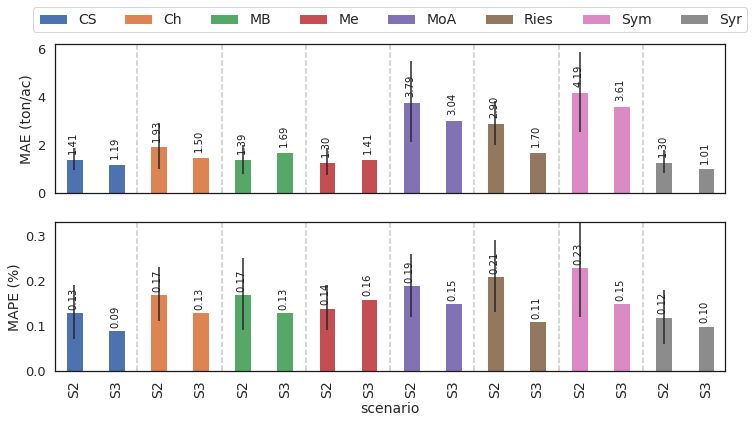

In [10]:
df = pd.DataFrame()


cultivars = ['CS', 'CS', 
            'Ch', 'Ch',  
            'MB','MB', 
            'Me', 'Me',  
            'MoA', 'MoA', 
            'Ries', 'Ries', 
            'Sym', 'Sym',  
            'Syr', 'Syr']


'''MAE       = [0.77, 1.41, 1.19, 
            0.64, 1.93, 1.50, 
            0.94, 1.39, 1.69, 
            0.62, 1.30, 1.41, 
            1.60, 3.79, 3.04,  
            0.98, 2.90, 1.70,  
            1.16, 4.19, 3.61, 
            0.63, 1.30, 1.01]

MAE_S      = [0.00, 0.46, 0.00,
            0.00, 0.96, 0.00,  
            0.00, 0.61, 0.00,  
            0.00, 0.58, 0.00, 
            0.00, 1.69, 0.00, 
            0.00, 0.93, 0.00, 
            0.00, 1.67, 0.00,
            0.00, 0.50, 0.00]

MAPE      = [0.07, 0.13, 0.09, 
            0.06, 0.17, 0.13, 
            0.13, 0.17, 0.13, 
            0.07, 0.14, 0.16,
            0.08,0.19, 0.15, 
            0.07, 0.21, 0.11,  
            0.06, 0.23, 0.15,  
            0.06, 0.12, 0.10]

MAPE_S    = [0.00, 0.06, 0.00,  
            0.00, 0.06, 0.00,  
            0.00, 0.08, 0.00,  
            0.00, 0.05, 0.00, 
            0.00, 0.07, 0.00,  
            0.00, 0.08, 0.00, 
            0.00, 0.11, 0.00, 
            0.00, 0.06, 0.00]'''

MAE       = [1.41, 1.19, 
            1.93, 1.50, 
            1.39, 1.69, 
            1.30, 1.41, 
            3.79, 3.04,  
            2.90, 1.70,  
            4.19, 3.61, 
            1.30, 1.01]

MAE_S      = [0.46, 0.00,
             0.96, 0.00,  
            0.61, 0.00,  
            0.58, 0.00, 
            1.69, 0.00, 
            0.93, 0.00, 
            1.67, 0.00,
            0.50, 0.00]

MAPE      = [0.13, 0.09, 
            0.17, 0.13, 
            0.17, 0.13, 
            0.14, 0.16,
            0.19, 0.15, 
            0.21, 0.11,  
            0.23, 0.15,  
            0.12, 0.10]

MAPE_S    = [0.06, 0.00,  
            0.06, 0.00,  
            0.08, 0.00,  
            0.05, 0.00, 
            0.07, 0.00,  
            0.08, 0.00, 
            0.11, 0.00, 
            0.06, 0.00]


scenario  = ['S2', 'S3', 
            'S2', 'S3',
              'S2', 'S3', 
             'S2', 'S3', 
             'S2', 'S3', 
              'S2', 'S3', 
              'S2', 'S3', 
              'S2', 'S3']


df['cultivar'] = cultivars
df['scenario'] = scenario
df['MAE'] = MAE
df['MAPE'] = MAPE

C_CS = sns.color_palette()[0]
C_Ch = sns.color_palette()[1]
C_MB = sns.color_palette()[2]
C_Me = sns.color_palette()[3]  
C_MoA = sns.color_palette()[4]
C_Ries = sns.color_palette()[5]
C_Sym = sns.color_palette()[6]
C_Syr = sns.color_palette()[7] 

colors = [C_CS, C_CS,
            C_Ch, C_Ch, 
            C_MB, C_MB,
           C_Me, C_Me, 
            C_MoA, C_MoA, 
            C_Ries, C_Ries,  
            C_Sym, C_Sym, 
            C_Syr, C_Syr]


cc_labels = {"CS": C_CS, "Ch": C_Ch, "MB": C_MB, "Me": C_Me,"MoA": C_MoA, "Ries": C_Ries,"Sym": C_Sym, "Syr": C_Syr}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 6))


plt.rcParams["axes.grid"] = False
mae = df.plot.bar(x = 'scenario', y = 'MAE', color = colors, yerr = MAE_S,  width = 0.4, ax = ax1)
bars = ax1.patches

#hatches = ["*",'+', 'x', 'O', "*",'+', 'x', 'O',"*",'+', 'x', 'O',"*",'+', 'x', 'O',"*",'+', 'x', 'O',"*",'+', 'x', 'O',"*",'+', 'x', 'O']

#for bar, hatch in zip(bars, hatches):
#    bar.set_hatch(hatch*2)

#first_legend = 


#ax1.gca().add_artist(first_legend)

ax1.legend([Patch(facecolor=cc_labels['CS']), Patch(facecolor=cc_labels['Ch']),
Patch(facecolor=cc_labels['MB']), Patch(facecolor=cc_labels['Me']), Patch(facecolor=cc_labels['MoA']),Patch(facecolor=cc_labels['Ries']), 
Patch(facecolor=cc_labels['Sym']), Patch(facecolor=cc_labels['Syr'])], ["CS", "Ch", "MB", "Me", "MoA", "Ries", "Sym", "Syr"], loc='upper center', ncol=8, bbox_to_anchor=(0.5, 1.3))

for i, v in enumerate(df["MAE"].iteritems()):        
    ax1.text(i ,v[1], "{:.2f}".format(v[1]), color='k', position = (i-0.15, v[1] + 0.3), fontsize = 'small', rotation=90)
ax1.set_ylim([0, df['MAE'].max()+2])
ax1.axes.get_xaxis().set_visible(False)
ax1.set(ylabel='MAE (ton/ac)')
ax1.set_facecolor('white')
ax1.axvline(x = 1.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax1.axvline(x = 3.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax1.axvline(x = 5.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax1.axvline(x = 7.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax1.axvline(x = 9.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax1.axvline(x = 11.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax1.axvline(x = 13.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
plt.setp(ax1.spines.values(), color='k')


mape = df.plot.bar(x = 'scenario', y = 'MAPE', color = colors, yerr = MAPE_S,  width = 0.4, ax = ax2)
for j, m in enumerate(df["MAPE"].iteritems()):        
    ax2.text(j ,m[1], "{:.2f}".format(m[1]), color='k', position = (j - 0.15, m[1] + 0.01), fontsize = 'small', rotation=90)
#bars2 = ax2.patches
#for bar, hatch in zip(bars2, hatches):
#    bar.set_hatch(hatch*2)
ax2.set_ylim([0, df['MAPE'].max()+0.1])
ax2.set(xlabel = 'scenario', ylabel='MAPE (%)')
ax2.set_facecolor('white')
plt.setp(ax2.spines.values(), color='k')

#pattern_labels = {"S1": "*", "S2": "+", "S3": "x", "S4": "O"}
#ax2.legend([Patch(hatch=pattern_labels['S1']*2, facecolor= 'k'), Patch(hatch=pattern_labels['S2']*2, facecolor= 'k'), 
#Patch(hatch=pattern_labels['S3']*2, facecolor= 'k'),Patch(hatch=pattern_labels['S4']*2, facecolor= 'k')], 
#["S1", "S2", "S3",  "S4"], loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.2))
ax2.legend().set_visible(False)
plt.xticks(rotation=90, fontsize = 14)
ax2.axvline(x = 1.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax2.axvline(x = 3.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax2.axvline(x = 5.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax2.axvline(x = 7.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax2.axvline(x = 9.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax2.axvline(x = 11.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax2.axvline(x = 13.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')

plt.show()
None  

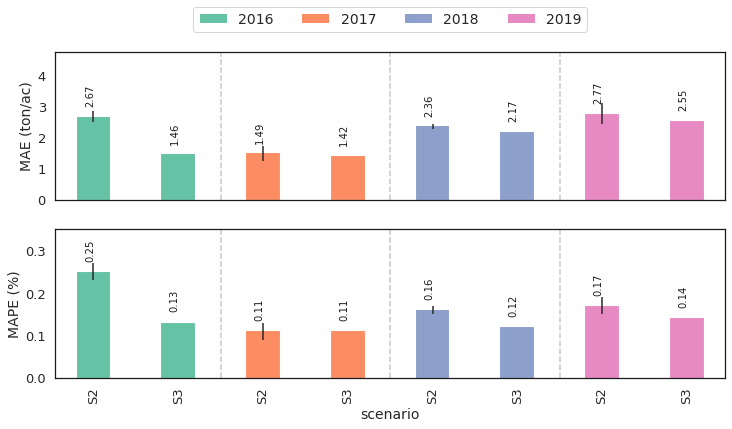

In [35]:
df = pd.DataFrame()


years = ['2016', '2016', 
         '2017', '2017',  
          '2018','2018', 
          '2019', '2019']

'''MAE       = [1.17, 2.67, 1.46, 
            0.80, 1.49, 1.42, 
            0.81, 2.36, 2.17, 
            0.94, 2.77, 2.55]

MAE_S      = [0.00, 0.18, 0.00,
            0.00, 0.23, 0.00,  
            0.00, 0.08, 0.00,  
            0.00, 0.33, 0.00]

MAPE      = [0.12, 0.25, 0.13, 
            0.06, 0.11, 0.11, 
            0.06, 0.16, 0.12, 
            0.06, 0.17, 0.14]

MAPE_S    = [0.00, 0.02, 0.00,  
            0.00, 0.02, 0.00,  
            0.00, 0.01, 0.00,  
            0.00, 0.02, 0.00]'''

MAE       = [ 2.67, 1.46, 
            1.49, 1.42, 
            2.36, 2.17, 
            2.77, 2.55]

MAE_S      = [0.18, 0.00,
            0.23, 0.00,  
            0.08, 0.00,  
            0.33, 0.00]

MAPE      = [0.25, 0.13, 
            0.11, 0.11, 
            0.16, 0.12, 
            0.17, 0.14]

MAPE_S    = [0.02, 0.00,  
            0.02, 0.00,  
            0.01, 0.00,  
            0.02, 0.00]


scenario  = ['S2', 'S3', 
            'S2', 'S3',
             'S2', 'S3', 
             'S2', 'S3']


df['year'] = years
df['scenario'] = scenario
df['MAE'] = MAE
df['MAPE'] = MAPE


c_2016 = sns.color_palette("Set2")[0]
c_2017 = sns.color_palette("Set2")[1]
c_2018 = sns.color_palette("Set2")[2]
c_2019 = sns.color_palette("Set2")[3]

colors = [ c_2016, c_2016,
            c_2017, c_2017, 
            c_2018, c_2018,
            c_2019, c_2019]




year_colours_labels = {"2016": c_2016, "2017": c_2017, "2018": c_2018, "2019": c_2019}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 6))


plt.rcParams["axes.grid"] = False
mae = df.plot.bar(x = 'scenario', y = 'MAE', color = colors, yerr = MAE_S, linewidth=0.1, width = 0.4, ax = ax1)
bars = ax1.patches



ax1.legend([Patch(facecolor=year_colours_labels['2016']), Patch(facecolor=year_colours_labels['2017']),
Patch(facecolor=year_colours_labels['2018']), Patch(facecolor=year_colours_labels['2019'])], ["2016", "2017", "2018", "2019"], loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.35), fontsize = 14)

for i, v in enumerate(df["MAE"].iteritems()):        
    ax1.text(i ,v[1], "{:.2f}".format(v[1]), color='k', position = (i-0.10, v[1] + 0.4), fontsize = 'small', rotation=90)
ax1.set_ylim([0, df['MAE'].max()+2])
ax1.axes.get_xaxis().set_visible(False)
ax1.set(ylabel='MAE (ton/ac)')
ax1.set_facecolor('white')
ax1.axvline(x = 1.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax1.axvline(x = 3.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax1.axvline(x = 5.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')

plt.setp(ax1.spines.values(), color='k')


mape = df.plot.bar(x = 'scenario', y = 'MAPE', color = colors, yerr = MAPE_S, linewidth=0.1,  width = 0.4, ax = ax2)
for j, m in enumerate(df["MAPE"].iteritems()):        
    ax2.text(j ,m[1], "{:.2f}".format(m[1]), color='k', position = (j - 0.10, m[1] + 0.03), fontsize = 'small', rotation=90)
#bars2 = ax2.patches
#for bar, hatch in zip(bars2, hatches):
#    bar.set_hatch(hatch*2)
ax2.set_ylim([0, df['MAPE'].max()+0.1])
ax2.set(xlabel = 'scenario', ylabel='MAPE (%)')
ax2.set_facecolor('white')
plt.setp(ax2.spines.values(), color='k')

#pattern_labels = {"S1": "*", "S2": "+", "S3": "x", "S4": "O"}
#ax2.legend([Patch(hatch=pattern_labels['S1']*2, facecolor= 'k'), Patch(hatch=pattern_labels['S2']*2, facecolor= 'k'), 
#Patch(hatch=pattern_labels['S3']*2, facecolor= 'k'),Patch(hatch=pattern_labels['S4']*2, facecolor= 'k')], 
#["S1", "S2", "S3",  "S4"], loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.2))
ax2.legend().set_visible(False)
plt.xticks(rotation=90, fontsize = 13)
ax2.axvline(x = 1.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax2.axvline(x = 3.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')
ax2.axvline(x = 5.5, linestyle = '--', color = '#C5C9C7', label = 'axvline - full height')


plt.show()
None  